<a href="https://colab.research.google.com/github/JerryLiu789/Credit-limit-optimization/blob/main/BankChurners_%E8%B3%87%E6%96%99%E5%BB%B6%E4%BC%B8%E6%87%89%E7%94%A8_%E9%A1%A7%E5%AE%A2%E5%88%86%E7%BE%A4%E8%88%87%E4%BF%A1%E7%94%A8%E9%A1%8D%E5%BA%A6%E5%84%AA%E5%8C%96.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 環境準備

In [1]:
from google.colab import drive
import pandas as pd

drive.mount('/content/drive')

# 讀取 Google Drive 中的文件
file_path = '/content/drive/My Drive/BankChurners.csv'
df = pd.read_csv(file_path)
df.head()


Mounted at /content/drive


,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


# 資料欄位定義

CLIENTNUM: 客戶編號（唯一識別碼）。

Attrition_Flag: 客戶流失標籤，標示客戶是否流失（如 "Existing Customer" 為現有客戶，"Attrited Customer" 為已流失客戶）。

Customer_Age: 客戶年齡。

Gender: 客戶性別，"M" 為男性，"F" 為女性。

Dependent_count: 客戶的受養人數量，這個數字表示該客戶負責供養的家庭成員或其他依賴他們經濟支持的人數。

Education_Level: 客戶的教育程度： Doctorate（博士學位） Post-Graduate（研究生） Graduate（大學畢業） College（大專） High School（高中） Uneducated（無受教育） Unknown（未知）

Marital_Status: 客戶婚姻狀況， Married（已婚） Single（單身） Unknown（未知） Divorced（離婚）

Income_Category: 客戶的收入類別，例如 " 60K− 80K" 表示收入在 60,000 至 80,000 美元之間。

Card_Category: 信用卡類別， Platinum（鉑金卡） Gold（金卡） Silver（銀卡） Blue（藍卡）

Months_on_book: 客戶開卡後的月數。

Total_Relationship_Count: 客戶的總關係數（與銀行的互動次數）。

Months_Inactive_12_mon: 過去12個月內不活躍的月份數。

Contacts_Count_12_mon: 過去12個月內客戶聯繫次數。

Credit_Limit: 信用卡額度。

Total_Revolving_Bal: 客戶的總循環餘額（信用卡透支未償還金額）。

Avg_Open_To_Buy: 平均可用信用額度（信用額度減去循環餘額）。

Total_Amt_Chng_Q4_Q1: 第四季度與第一季度間的總交易額變化比率。

Total_Trans_Amt: 總交易金額。

Total_Trans_Ct: 總交易次數。

Total_Ct_Chng_Q4_Q1: 第四季度與第一季度間的交易次數變化比率。

Avg_Utilization_Ratio: 平均使用率（信用卡使用比率）。

Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1: 用於預測流失的樸素貝葉斯分類器特徵1。

Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2: 用於預測流失的樸素貝葉斯分類器特徵2。

# 確認資料狀況

In [2]:
# 確認資料狀況
print(df.describe())
print('-'*60)
print(df.info())
print('-'*60)
print(df.isnull().sum())
print('-'*60)

# 計算 Attrition_Flag 欄位中各標籤的比例
label_proportion = df['Attrition_Flag'].value_counts(normalize=True)

# 顯示標籤比例
print(label_proportion)

          CLIENTNUM  Customer_Age  Dependent_count  Months_on_book  \
count  1.012700e+04  10127.000000     10127.000000    10127.000000   
mean   7.391776e+08     46.325960         2.346203       35.928409   
std    3.690378e+07      8.016814         1.298908        7.986416   
min    7.080821e+08     26.000000         0.000000       13.000000   
25%    7.130368e+08     41.000000         1.000000       31.000000   
50%    7.179264e+08     46.000000         2.000000       36.000000   
75%    7.731435e+08     52.000000         3.000000       40.000000   
max    8.283431e+08     73.000000         5.000000       56.000000   

       Total_Relationship_Count  Months_Inactive_12_mon  \
count              10127.000000            10127.000000   
mean                   3.812580                2.341167   
std                    1.554408                1.010622   
min                    1.000000                0.000000   
25%                    3.000000                2.000000   
50%            

1.年齡分佈 (Customer_Age)

客戶年齡的平均值是 46.33 歲，標準差為 8 歲。年齡分佈從 26 歲到 73 歲之間，這表明這些信用卡客戶的年齡跨度較大。

2.信用額度 (Credit_Limit)

平均信用額度為 8,631 美元，最大額度為 34,516 美元，最小額度為 1,438 美元。這說明客戶的信用額度有很大差異。

3.客戶的活動與非活動情況

過去 12 個月中非活動的月份數 (Months_Inactive_12_mon) 平均為 2.34，最長的非活動時間為 6 個月。這可以作為預測客戶流失的潛在重要特徵。

4.總關係數 (Total_Relationship_Count)

客戶與銀行的總關係數平均為 3.81，這可能與客戶的忠誠度有關。該變數的最大值為 6，代表一些客戶與銀行有多種關係。

5.信用卡使用率 (Avg_Utilization_Ratio)

信用卡使用率的平均值為 27.49%，這表明大部分客戶只使用了約四分之一的信用額度。

6.交易活動

平均每位客戶的交易總金額 (Total_Trans_Amt) 為 4,404 美元，總交易次數 (Total_Trans_Ct) 平均為 65 次，說明這些客戶的交易活躍度相對較高。

# 類別欄位轉換

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

# 使用 One-Hot Encoding 處理 Marital_Status
df_one_hot = pd.get_dummies(df, columns=['Marital_Status'], drop_first=True)

# 定義欄位及其類別順序
ordinal_cols = ['Attrition_Flag', 'Gender', 'Education_Level', 'Income_Category', 'Card_Category']

# 指定每個欄位的類別順序
ordinal_categories = [
    ['Existing Customer', 'Attrited Customer'],  # Attrition_Flag
    ['F', 'M'],  # Gender
    ['Unknown', 'Uneducated', 'High School', 'College', 'Graduate', 'Post-Graduate', 'Doctorate'],  # Education_Level
    ['Unknown', 'Less than $40K', '$40K - $60K', '$60K - $80K', '$80K - $120K', '$120K +'],  # Income_Category
    ['Blue', 'Silver', 'Gold', 'Platinum']  # Card_Category
]

# 創建 OrdinalEncoder 並指定順序
ordinal_encoder = OrdinalEncoder(categories=ordinal_categories)

# 對資料進行有序編碼
df_one_hot[ordinal_cols] = ordinal_encoder.fit_transform(df_one_hot[ordinal_cols])

# 檢查轉換後的結果
df_one_hot.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,...,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown
0,768805383,0.0,45,1.0,3,2.0,3.0,0.0,39,5,...,1.335,1144,42,1.625,0.061,0.000093,0.99991,True,False,False
1,818770008,0.0,49,0.0,5,4.0,1.0,0.0,44,6,...,1.541,1291,33,3.714,0.105,0.000057,0.99994,False,True,False
2,713982108,0.0,51,1.0,3,4.0,4.0,0.0,36,4,...,2.594,1887,20,2.333,0.000,0.000021,0.99998,True,False,False
3,769911858,0.0,40,0.0,4,2.0,1.0,0.0,34,3,...,1.405,1171,20,2.333,0.760,0.000134,0.99987,False,False,True
4,709106358,0.0,40,1.0,3,1.0,3.0,0.0,21,5,...,2.175,816,28,2.500,0.000,0.000022,0.99998,True,False,False


# 主題一、顧客分群與精準營銷（Customer Segmentation & Targeted Marketing）

目的：對客戶進行多維度的分群。分群後可以根據不同的群體設計精準的營銷策略，提升營銷效率。

預期應用情境：

1. 提升客戶參與度：根據不同群體的特點（如高價值客戶、潛在流失客戶、新客戶等）設計針對性的促銷活動，提升營銷回報率。

2. 優化資源分配：通過對高價值和低價值客戶進行分群，企業能夠將更多資源集中在潛力更大的客戶上，提升投資回報率（ROI）。

## 利用 k-means 進行分群

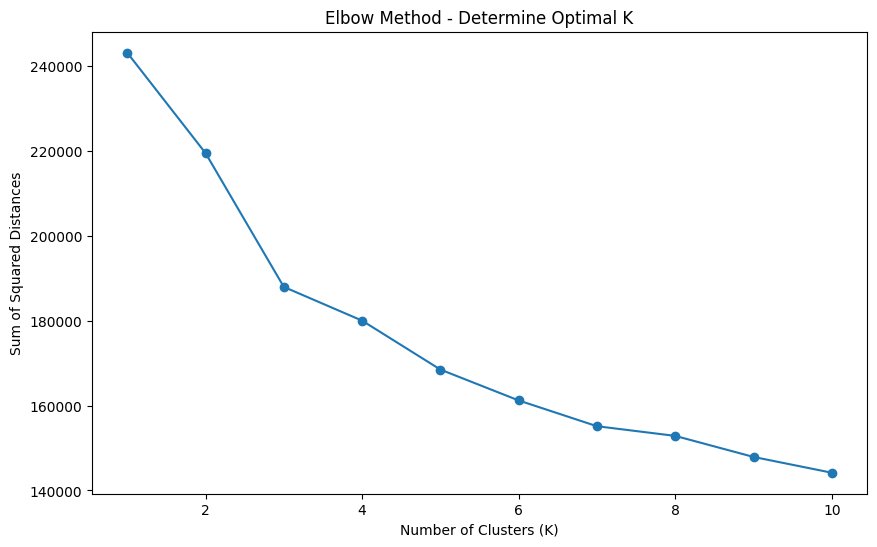

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns


# 選擇數值特徵進行分群，去掉 'CLIENTNUM' 列，選擇所有剩餘的特徵
features = df_one_hot.drop(columns=['CLIENTNUM']).columns

# 獲取數據
X = df_one_hot[features]

# 標準化數據（對數據進行標準化，讓各個變數在同一尺度上）
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 使用 K-means 聚類
# 通過「肘部法則」來決定最佳的 K 值
sse = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)

# 畫出肘部法則圖表來決定最佳的 K 值
plt.figure(figsize=(10,6))
plt.plot(k_range, sse, marker='o')
plt.title('Elbow Method - Determine Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squared Distances')
plt.show()

從 K=2 到 K=4，SSE 下降得很快，K=4 之後下降的速度變得緩慢，選擇 k=4 當作群集數量。

         Attrition_Flag  Customer_Age    Gender  Dependent_count  \
Cluster                                                            
0              0.000000     46.312778  0.354328         2.262325   
1              0.001684     45.496633  0.476431         2.523569   
2              1.000000     46.673790  0.416091         2.395977   
3              0.018647     46.336175  0.892381         2.518913   

         Education_Level  Income_Category  Card_Category  Months_on_book  \
Cluster                                                                    
0               2.599176         1.663974       0.006925       35.916570   
1               2.542088         2.089226       0.063973       35.006734   
2               2.641106         1.995600       0.060968       36.211816   
3               2.596697         3.523708       0.356953       36.018114   

         Total_Relationship_Count  Months_Inactive_12_mon  ...  \
Cluster                                                    ...   
0 

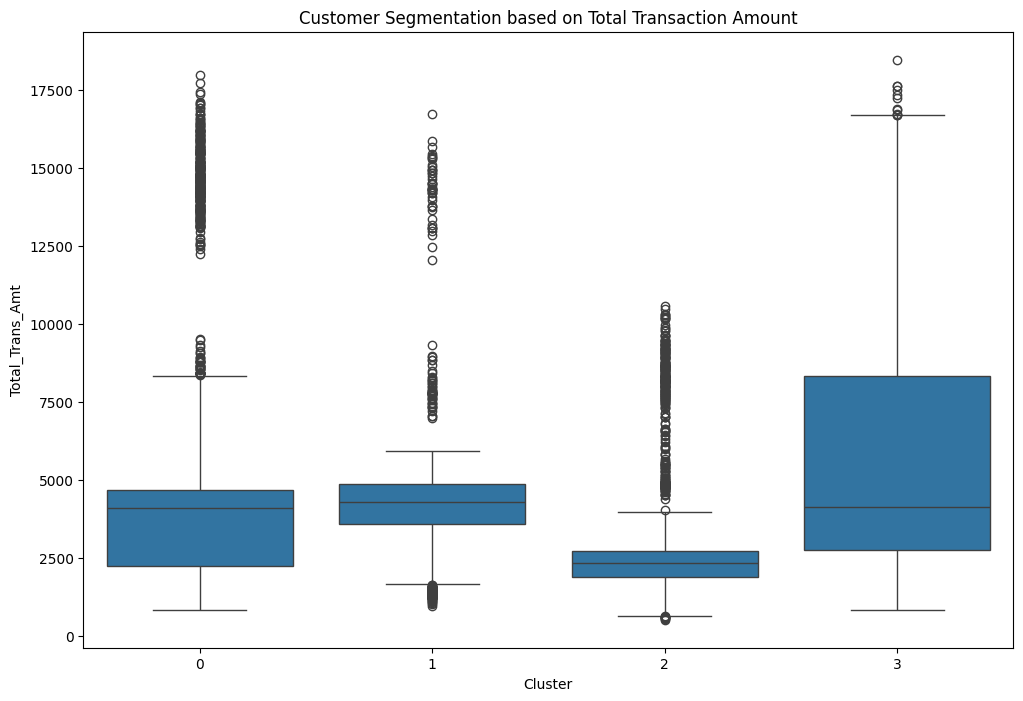

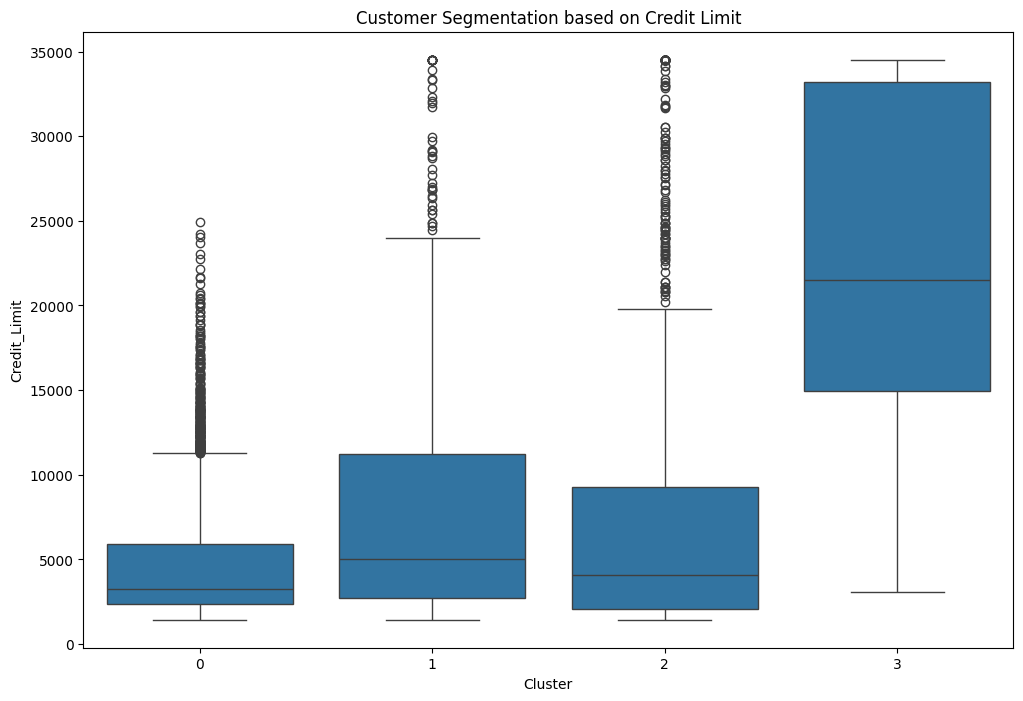

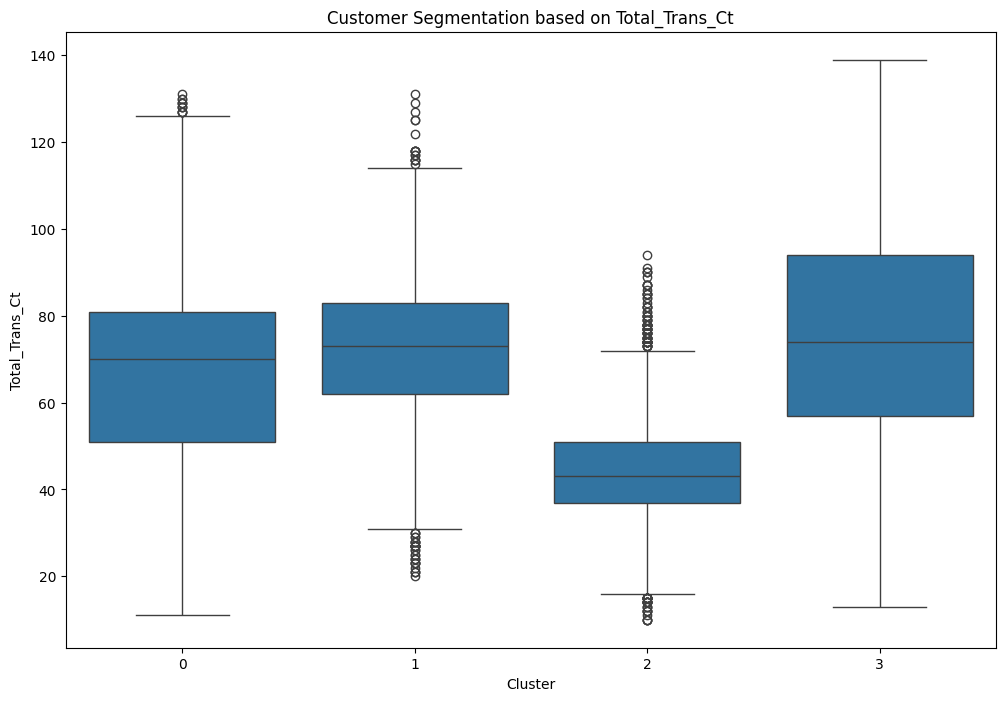

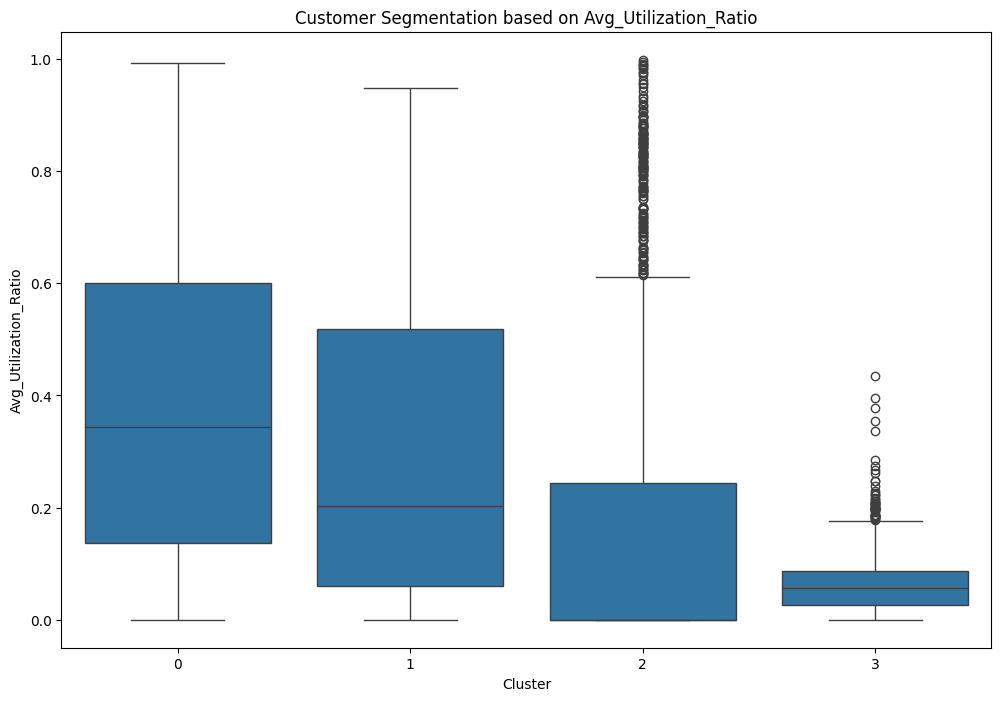

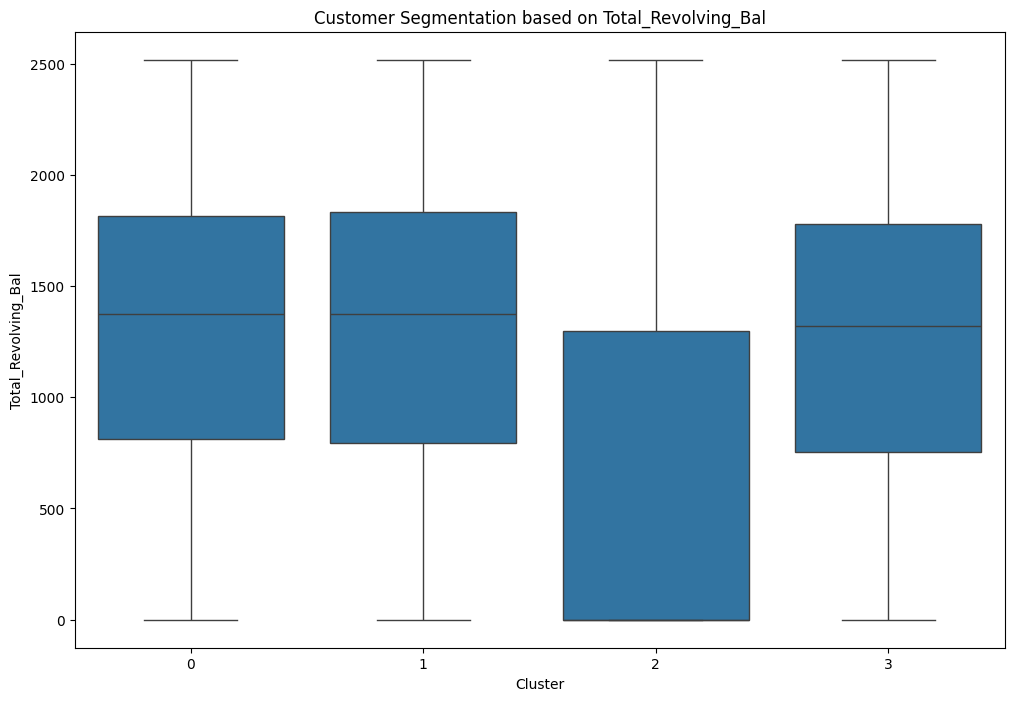

In [ ]:
from sklearn.metrics import silhouette_score

# 選擇 K=4 來進行聚類
kmeans = KMeans(n_clusters=4, random_state=42)
df_one_hot['Cluster'] = kmeans.fit_predict(X_scaled)

# 分析每個群體的特徵
# 分析每個群體的平均特徵值
cluster_analysis = df_one_hot.drop(columns=['CLIENTNUM']).groupby('Cluster').mean()
print(cluster_analysis)

# 可視化每個群體的重要特徵差異
plt.figure(figsize=(12,8))
sns.boxplot(x='Cluster', y='Total_Trans_Amt', data=df_one_hot)  # 總交易金額
plt.title('Customer Segmentation based on Total Transaction Amount')
plt.show()

plt.figure(figsize=(12,8))
sns.boxplot(x='Cluster', y='Credit_Limit', data=df_one_hot)
plt.title('Customer Segmentation based on Credit Limit')  # 信用卡額度
plt.show()

plt.figure(figsize=(12,8))
sns.boxplot(x='Cluster', y='Total_Trans_Ct', data=df_one_hot)  # 總交易次數
plt.title('Customer Segmentation based on Total_Trans_Ct')
plt.show()

plt.figure(figsize=(12,8))
sns.boxplot(x='Cluster', y='Avg_Utilization_Ratio', data=df_one_hot)  # 信用卡使用比率
plt.title('Customer Segmentation based on Avg_Utilization_Ratio')
plt.show()

plt.figure(figsize=(12,8))
sns.boxplot(x='Cluster', y='Total_Revolving_Bal', data=df_one_hot)  # 信用卡透支未償還金額
plt.title('Customer Segmentation based on Total_Revolving_Bal')
plt.show()


針對流失客戶（Cluster 1）：

這個群體的流失率接近 100%，收入水平高但活躍度低。可以調查是否是產品或服務問題導致了這些高收入客戶的流失，並針對他們推出個性化的挽留方案，如專屬的高端服務或針對高收入客戶的特別優惠。

針對忠誠客戶（Cluster 3）：

Cluster 3 是活躍度高、消費能力強且忠誠的客戶群體，應該將其視為核心客戶。可以針對這群體進行高價值客戶的忠誠度管理，推出專屬的福利計劃，增強他們對品牌的依賴性。

針對高利用率的客戶（Cluster 2）：

這些客戶雖然活躍度較低，但資金利用率較高，可能有較高的信用需求。可以考慮針對這個群體進行信貸相關產品的推廣，如提高信用額度、推出低利率貸款等。

提升互動和活躍度：

對於關係數量較低的群體（如 Cluster 1），可以嘗試通過更多的互動（例如定期電話回訪、個性化營銷等）來提升客戶的參與度，降低流失風險。

※ 部份重要特徵分群效果看起來並不顯著，並且異常值過多，聚類效果不夠理想，利用輪廓係數來檢查分群結果

### 利用輪廓係數檢查分群結果

In [ ]:
# 計算輪廓係數
# 定義測試的 K 值範圍
k_values = [3, 4, 5]

# 遍歷每個 K 值
for k in k_values:
    # 使用 KMeans 進行聚類
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)

    # 計算輪廓係數
    silhouette_avg = silhouette_score(X_scaled, kmeans.labels_)

    # 輸出結果
    print(f"For n_clusters = {k}, the average silhouette_score is : {silhouette_avg}")



For n_clusters = 3, the average silhouette_score is : 0.17288269512336438
For n_clusters = 4, the average silhouette_score is : 0.1676813063709594
For n_clusters = 5, the average silhouette_score is : 0.1240226120229795


使用 k-means 計算出來的輪廓係數過低，預計輪廓係數至少大於 0.5 才算是有較好的聚類效果，嘗試利用其它方法聚類來達到更好的輪廓係數

##  使用 DBSCAN 進行聚類

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# 標準化數據
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 設定 DBSCAN 的參數
# eps 是鄰域的最大距離，min_samples 是每個群集的最小點數
dbscan = DBSCAN(eps=0.5, min_samples=5)

# 執行聚類
dbscan_labels = dbscan.fit_predict(X_scaled)

# 計算輪廓係數 (排除噪音點即 label 為 -1 的點)
if len(set(dbscan_labels)) > 1:  # 確保存在多於一個群集
    silhouette_avg = silhouette_score(X_scaled[dbscan_labels != -1], dbscan_labels[dbscan_labels != -1])
    print(f"The silhouette score for DBSCAN is : {silhouette_avg}")
else:
    print("DBSCAN 未能成功找到有效群集，請嘗試調整 eps 和 min_samples 參數。")

# 顯示群集標籤結果
import numpy as np
unique_labels = np.unique(dbscan_labels)
print(f"DBSCAN identified {len(unique_labels)} clusters, including noise points (label -1).")


DBSCAN 未能成功找到有效群集，請嘗試調整 eps 和 min_samples 參數。
DBSCAN identified 1 clusters, including noise points (label -1).


由於 eps 和 min_samples 參數的選擇不合適，導致算法沒有找到足夠密集的數據點來形成群集。

### 探索適合的 eps，根據數據的鄰近距離來估計合適的 eps 值

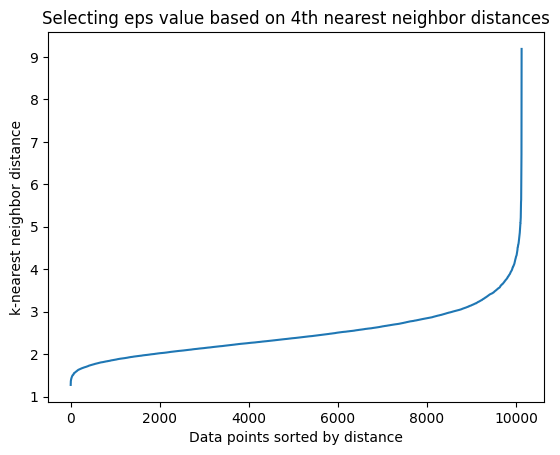

In [ ]:
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import numpy as np

# 計算每個點到其最近的 4 個鄰居的距離 (k=4)
neigh = NearestNeighbors(n_neighbors=4)
nbrs = neigh.fit(X_scaled)
distances, indices = nbrs.kneighbors(X_scaled)

# 將這些距離進行排序
distances = np.sort(distances[:, 3], axis=0)  # 取每個點到第 4 近鄰的距離

# 畫出距離圖，幫助選擇 eps
plt.plot(distances)
plt.ylabel('k-nearest neighbor distance')
plt.xlabel('Data points sorted by distance')
plt.title('Selecting eps value based on 4th nearest neighbor distances')
plt.show()


拐點大約在距離 4.0 左右，嘗試將 eps 設置為 4.0 來運行 DBSCAN

In [ ]:
# 設定 DBSCAN 的參數
# eps 是鄰域的最大距離，min_samples 是每個群集的最小點數
dbscan = DBSCAN(eps=4, min_samples=4)

# 執行聚類
dbscan_labels = dbscan.fit_predict(X_scaled)

# 計算輪廓係數 (排除噪音點即 label 為 -1 的點)
if len(set(dbscan_labels)) > 1:  # 確保存在多於一個群集
    silhouette_avg = silhouette_score(X_scaled[dbscan_labels != -1], dbscan_labels[dbscan_labels != -1])
    print(f"The silhouette score for DBSCAN is : {silhouette_avg}")
else:
    print("DBSCAN 未能成功找到有效群集，請嘗試調整 eps 和 min_samples 參數。")

# 顯示群集標籤結果
import numpy as np
unique_labels = np.unique(dbscan_labels)
print(f"DBSCAN identified {len(unique_labels)} clusters, including noise points (label -1).")

The silhouette score for DBSCAN is : 0.15485506998115664
DBSCAN identified 5 clusters, including noise points (label -1).


嘗試了 k-means 與 DBSCAN，以及上述方法法的參數調整，輪廓係數的表現都差不多並且過低，這表明數據可能存在結構性問題，無法通過簡單參數調整來提升輪廓係數。

## 使用 PCA 來進行降維

In [ ]:
from sklearn.decomposition import PCA

# 使用 PCA 將數據降維至 2D
pca = PCA(n_components=2)  # 減少至 2 維
X_pca = pca.fit_transform(X_scaled)

# 重新使用 K-means 聚類
kmeans = KMeans(n_clusters=4, random_state=42)
labels = kmeans.fit_predict(X_pca)

# 計算輪廓係數
silhouette_avg = silhouette_score(X_pca, labels)
print(f"Silhouette Score after PCA(2D): {silhouette_avg}")


# 使用 PCA 將數據降維至 3D
pca = PCA(n_components=3)  # 減少至 3 維
X_pca = pca.fit_transform(X_scaled)

# 重新使用 K-means 聚類
kmeans = KMeans(n_clusters=4, random_state=42)
labels = kmeans.fit_predict(X_pca)

# 計算輪廓係數
silhouette_avg = silhouette_score(X_pca, labels)
print(f"Silhouette Score after PCA(3D): {silhouette_avg}")

Silhouette Score after PCA(2D): 0.5616365737622165
Silhouette Score after PCA(3D): 0.3571582087405184


In [ ]:
# 查看每個主成分的變異性解釋比例
pca = PCA().fit(X_scaled)
explained_variance = pca.explained_variance_ratio_

# 查看累積變異性解釋比例
cumulative_variance = explained_variance.cumsum()
print(f"Cumulative explained variance for first 2 components: {cumulative_variance[1]}")
print(f"Cumulative explained variance for first 3 components: {cumulative_variance[2]}")


Cumulative explained variance for first 2 components: 0.2944124395230381
Cumulative explained variance for first 3 components: 0.3799904896673477


降維至 2D 輪廓係數為 0.56 代表聚類效果相對不錯，說明在降維至 2D 後，數據點在群集內的緊密性和群集之間的分離性比較強。然而，累積變異性解釋比例只有 0.29 表示僅用前兩個主成分保留了 29% 的數據變異性，這意味著還有 71% 的變異性未被解釋。這會影響到聚類結果的解釋力。因此，降維到 2D 或 3D 可能導致一定的信息損失，特別是當這些未被保留的主成分包含對聚類至關重要的變異時。

針對上述嘗試，判斷因資料結構問題，使用 k-means 與 DBSCAN 得到的聚類質量不理想，
進行 PCA 效果也不好，持續嘗試找出聚類質量更好的方法進行聚類

## 使用層次聚類（Hierarchical Clustering）來進行聚類

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage


# 選擇數值特徵進行分群，去掉 'CLIENTNUM' 列，選擇所有剩餘的特徵
features = df_one_hot.drop(columns=['CLIENTNUM']).columns

# 獲取數據
X = df_one_hot[features]

# 標準化數據
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 設定層次聚類
agg_clustering = AgglomerativeClustering(n_clusters=4, linkage='average')

# 執行聚類
labels = agg_clustering.fit_predict(X_scaled)

# 計算輪廓係數
silhouette_avg = silhouette_score(X_scaled, labels)
print(f"The silhouette score for hierarchical clustering is : {silhouette_avg}")


The silhouette score for hierarchical clustering is : 0.3699296167072559


使用鏈接方式（Linkage Method）= average，輪廓係數顯著優於 k-means 與 DBSCAN

average：使用兩個群集中所有點之間的平均距離，適合非球形的數據。

### 測試不同群集數量對應的輪廓係數

In [ ]:
from sklearn.metrics import silhouette_score

# 調整群集數量
for n_clusters in range(2, 10):
    agg_clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage='average')
    labels = agg_clustering.fit_predict(X_scaled)

    # 計算輪廓係數
    silhouette_avg = silhouette_score(X_scaled, labels)
    print(f"Number of clusters: {n_clusters}, Silhouette Score: {silhouette_avg}")


Number of clusters: 2, Silhouette Score: 0.5976886116122619
Number of clusters: 3, Silhouette Score: 0.4233042518361008
Number of clusters: 4, Silhouette Score: 0.3699296167072559
Number of clusters: 5, Silhouette Score: 0.28624512756370796
Number of clusters: 6, Silhouette Score: 0.24758078148933924
Number of clusters: 7, Silhouette Score: 0.2186699714203914
Number of clusters: 8, Silhouette Score: 0.20663477468798508
Number of clusters: 9, Silhouette Score: 0.18007300482602318


測試不同群集數量對應的輪廓係數，群集越低，輪廓係數越高

### 繪製樹狀圖尋找適合的群集數量

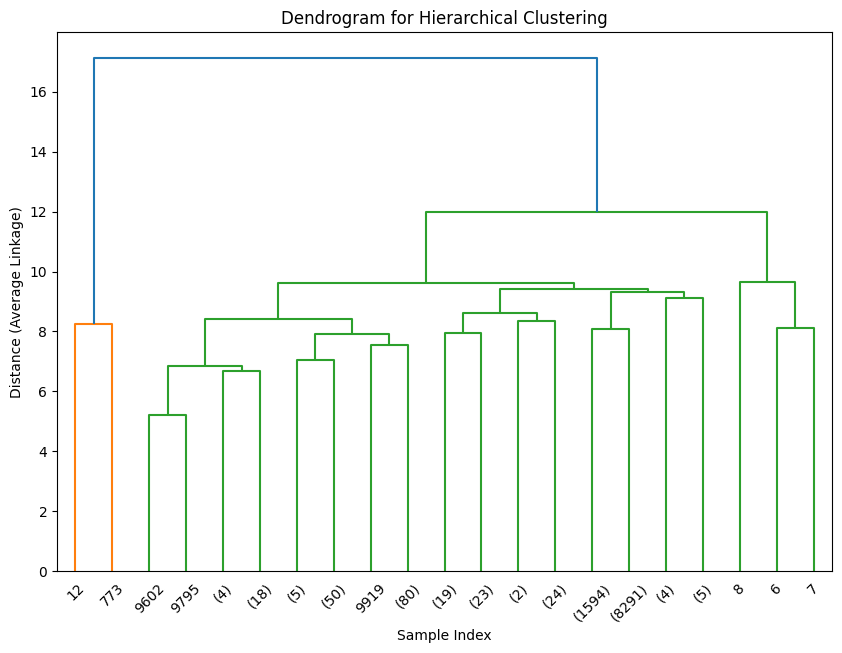

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# 計算層次聚類的連結矩陣
Z = linkage(X_scaled, method='average')

# 繪製樹狀圖
plt.figure(figsize=(10, 7))
dendrogram(Z, truncate_mode='level', p=5)  # 'p' 控制展示的層次深度
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Sample Index')
plt.ylabel('Distance (Average Linkage)')
plt.show()

在縱軸 17 的位置，可以看到整個圖被劃分為兩個主要分支。

這兩個大分支的距離很大，說明它們的相似性較低，

在距離約 10 的位置，樹狀圖顯示了幾個分支在這個距離範圍內被合併。

在距離 10 的地方切割樹狀圖，可以得到 4 到 5 個群集。這些群集之間的差異仍然顯著，但比 2 個群集的情況下更能捕捉細節和變化。

最終選擇 4 個群集來做後續分析

### 套用聚類成果

            CLIENTNUM  Attrition_Flag  Customer_Age    Gender  \
Cluster                                                         
1        7.122945e+08        0.000000      58.50000  1.000000   
2        7.391708e+08        0.160739      46.32543  0.470658   
3        8.146267e+08        0.000000      41.50000  1.000000   
4        7.109305e+08        0.000000      37.00000  1.000000   

         Dependent_count  Education_Level  Income_Category  Card_Category  \
Cluster                                                                     
1               0.500000         4.000000          2.00000       0.000000   
2               2.346572         2.602154          2.08526       0.083383   
3               2.000000         1.000000          4.00000       1.500000   
4               3.000000         1.000000          3.00000       0.000000   

         Months_on_book  Total_Relationship_Count  ...  Total_Amt_Chng_Q4_Q1  \
Cluster                                            ...            

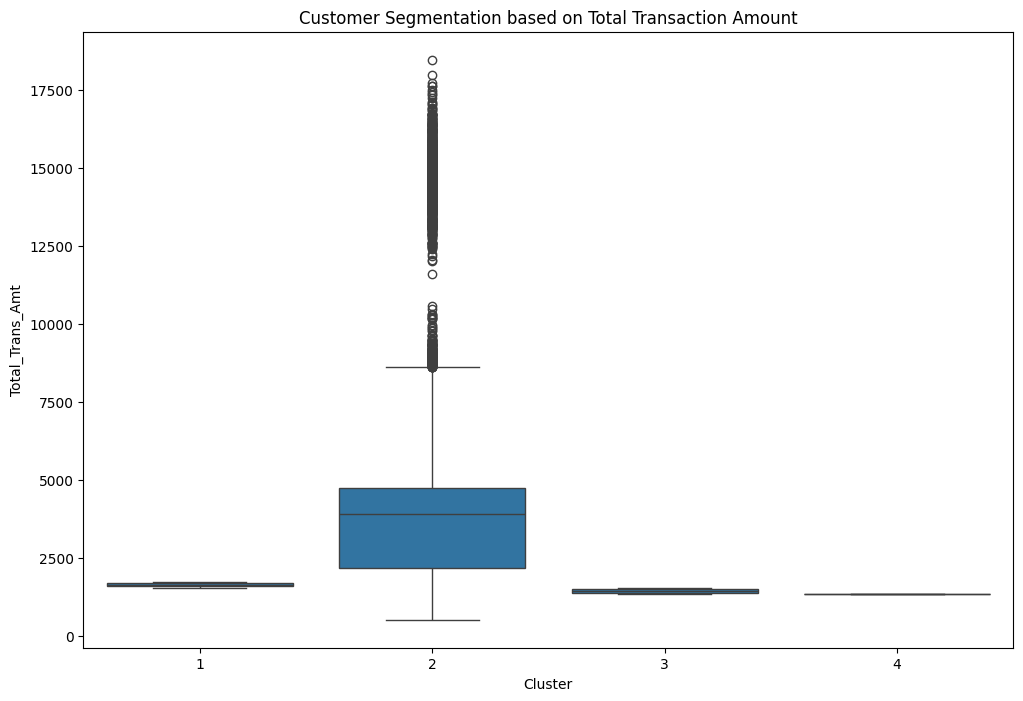

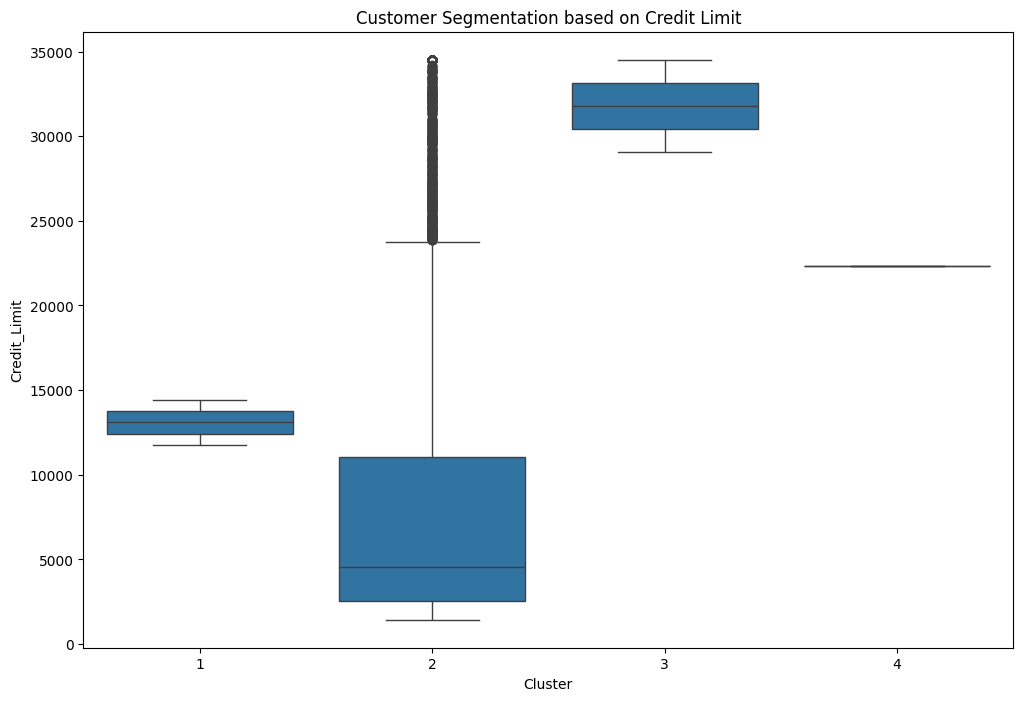

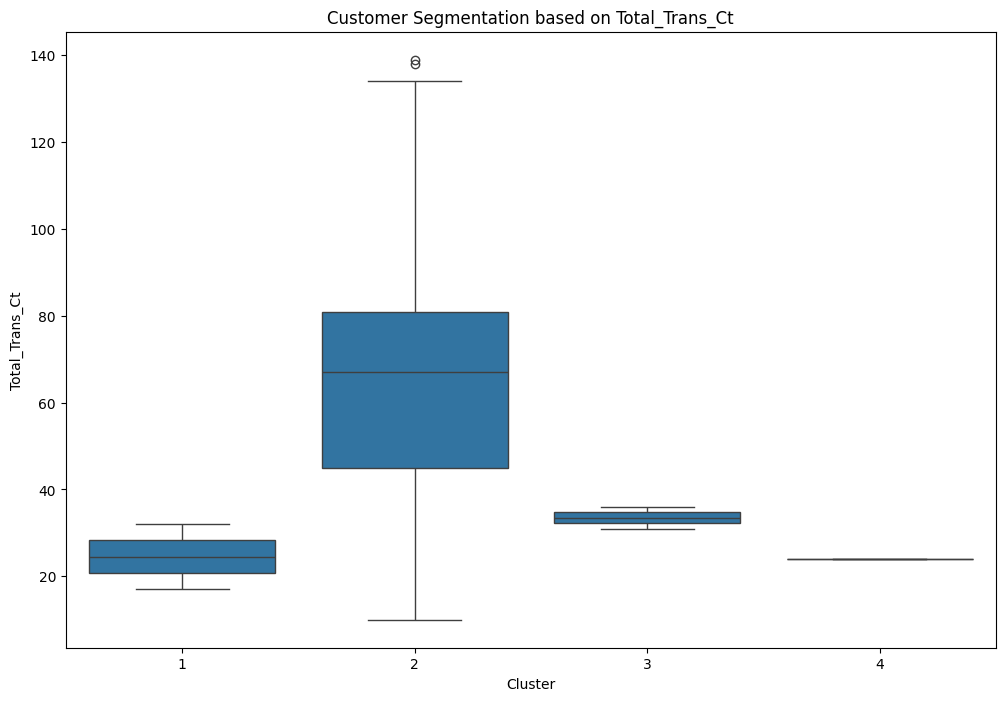

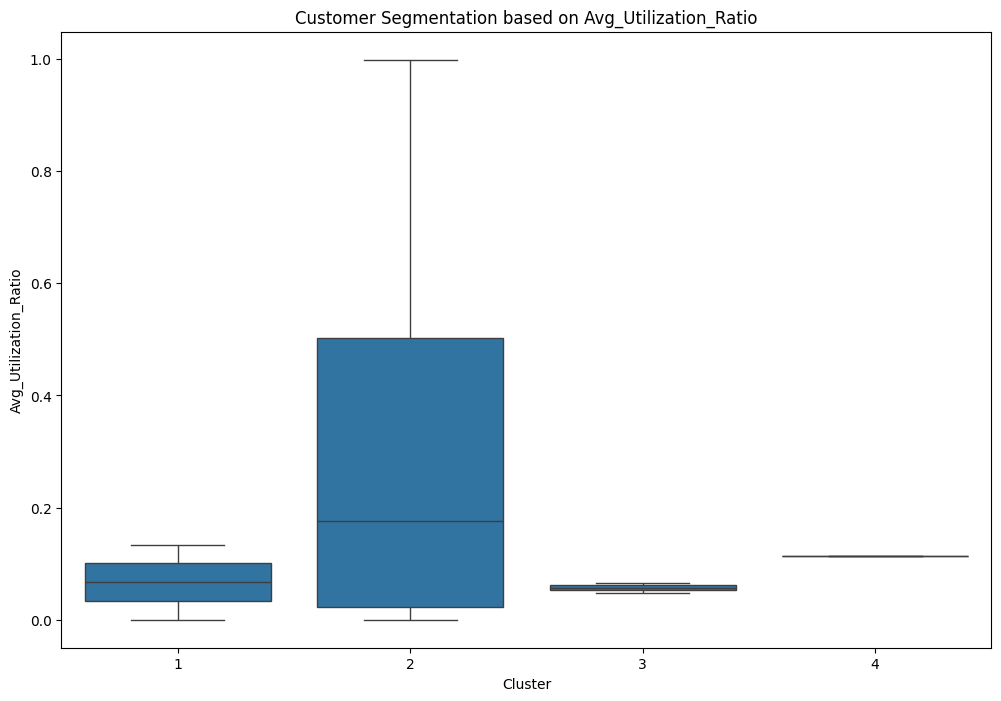

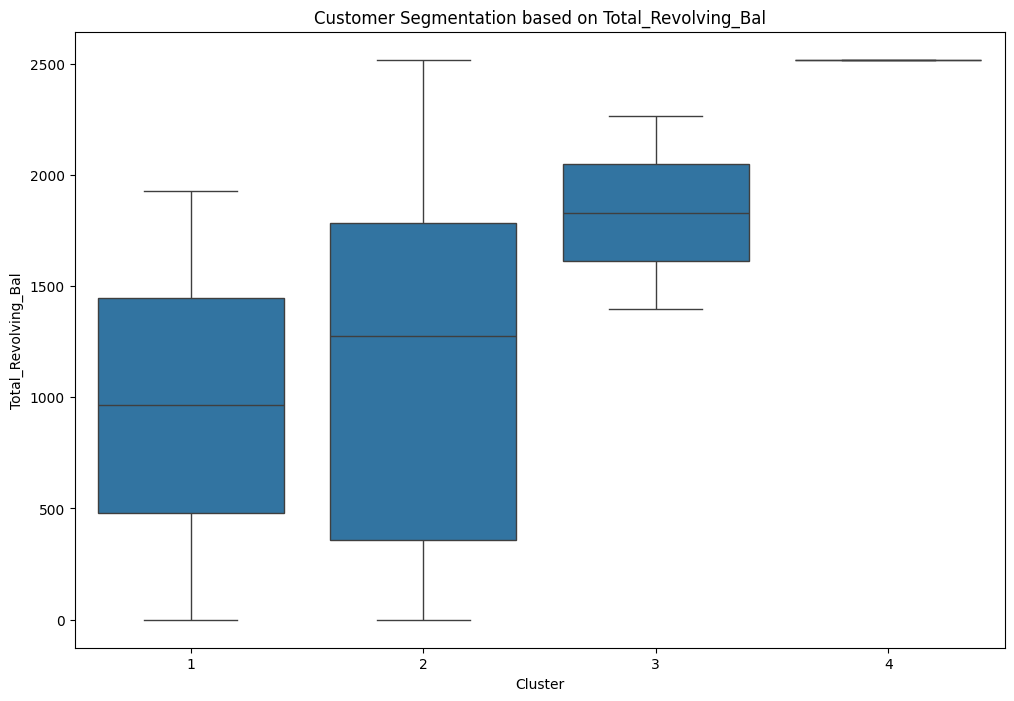

In [ ]:
from scipy.cluster.hierarchy import fcluster

# 根據層次聚類結果，選擇 4 個群集
cluster_labels = fcluster(Z, t=4, criterion='maxclust')

# 將群集標籤添加到原始資料中
df_one_hot['Cluster'] = cluster_labels

# 計算每個群集的平均值
cluster_analysis = df_one_hot.groupby('Cluster').mean()
print(cluster_analysis)

# 可視化每個群體的重要特徵差異
plt.figure(figsize=(12,8))
sns.boxplot(x='Cluster', y='Total_Trans_Amt', data=df_one_hot)  # 總交易金額
plt.title('Customer Segmentation based on Total Transaction Amount')
plt.show()

plt.figure(figsize=(12,8))
sns.boxplot(x='Cluster', y='Credit_Limit', data=df_one_hot)
plt.title('Customer Segmentation based on Credit Limit')  # 信用卡額度
plt.show()

plt.figure(figsize=(12,8))
sns.boxplot(x='Cluster', y='Total_Trans_Ct', data=df_one_hot)  # 總交易次數
plt.title('Customer Segmentation based on Total_Trans_Ct')
plt.show()

plt.figure(figsize=(12,8))
sns.boxplot(x='Cluster', y='Avg_Utilization_Ratio', data=df_one_hot)  # 信用卡使用比率
plt.title('Customer Segmentation based on Avg_Utilization_Ratio')
plt.show()

plt.figure(figsize=(12,8))
sns.boxplot(x='Cluster', y='Total_Revolving_Bal', data=df_one_hot)  # 信用卡透支未償還金額
plt.title('Customer Segmentation based on Total_Revolving_Bal')
plt.show()


部份群集看起來資料過少或過於集中，檢查各群集的資料量

### 檢查每個分群的數量是否平均

In [ ]:
# 計算每個群集的資料筆數
cluster_counts = df_one_hot['Cluster'].value_counts()

# 獲取整體資料的總筆數
total_count = len(df_one_hot)

# 計算每個群集所佔的百分比
cluster_percentage = (cluster_counts / total_count) * 100

# 將結果顯示出來
result = pd.DataFrame({'Cluster Count': cluster_counts, 'Percentage': cluster_percentage})
print(result)



         Cluster Count  Percentage
Cluster                           
2                10122   99.950627
3                    2    0.019749
1                    2    0.019749
4                    1    0.009875


99.9% 的資料都集中在群集 2 ，幾乎沒有達到聚類效果

### 測試僅用兩個群集，來確認資料分佈狀況

In [ ]:
# 根據層次聚類結果，選擇 2 個群集
cluster_labels = fcluster(Z, t=2, criterion='maxclust')

# 將群集標籤添加到原始資料中
df_one_hot['Cluster'] = cluster_labels

In [ ]:
# 計算每個群集的資料筆數
cluster_counts = df_one_hot['Cluster'].value_counts()

# 獲取整體資料的總筆數
total_count = len(df_one_hot)

# 計算每個群集所佔的百分比
cluster_percentage = (cluster_counts / total_count) * 100

# 將結果顯示出來
result = pd.DataFrame({'Cluster Count': cluster_counts, 'Percentage': cluster_percentage})
print(result)

         Cluster Count  Percentage
Cluster                           
2                10125   99.980251
1                    2    0.019749


測試將資料劃分為 2 個聚類，依然沒有聚類效果，以此推測是異常值影響了聚類的結果，導致不論使用什麼模型都無法順利進行有效聚類

# 特徵工程處理異常值，重新使用 k-means 進行聚類測試

### 確認擁有明顯異常值的特徵

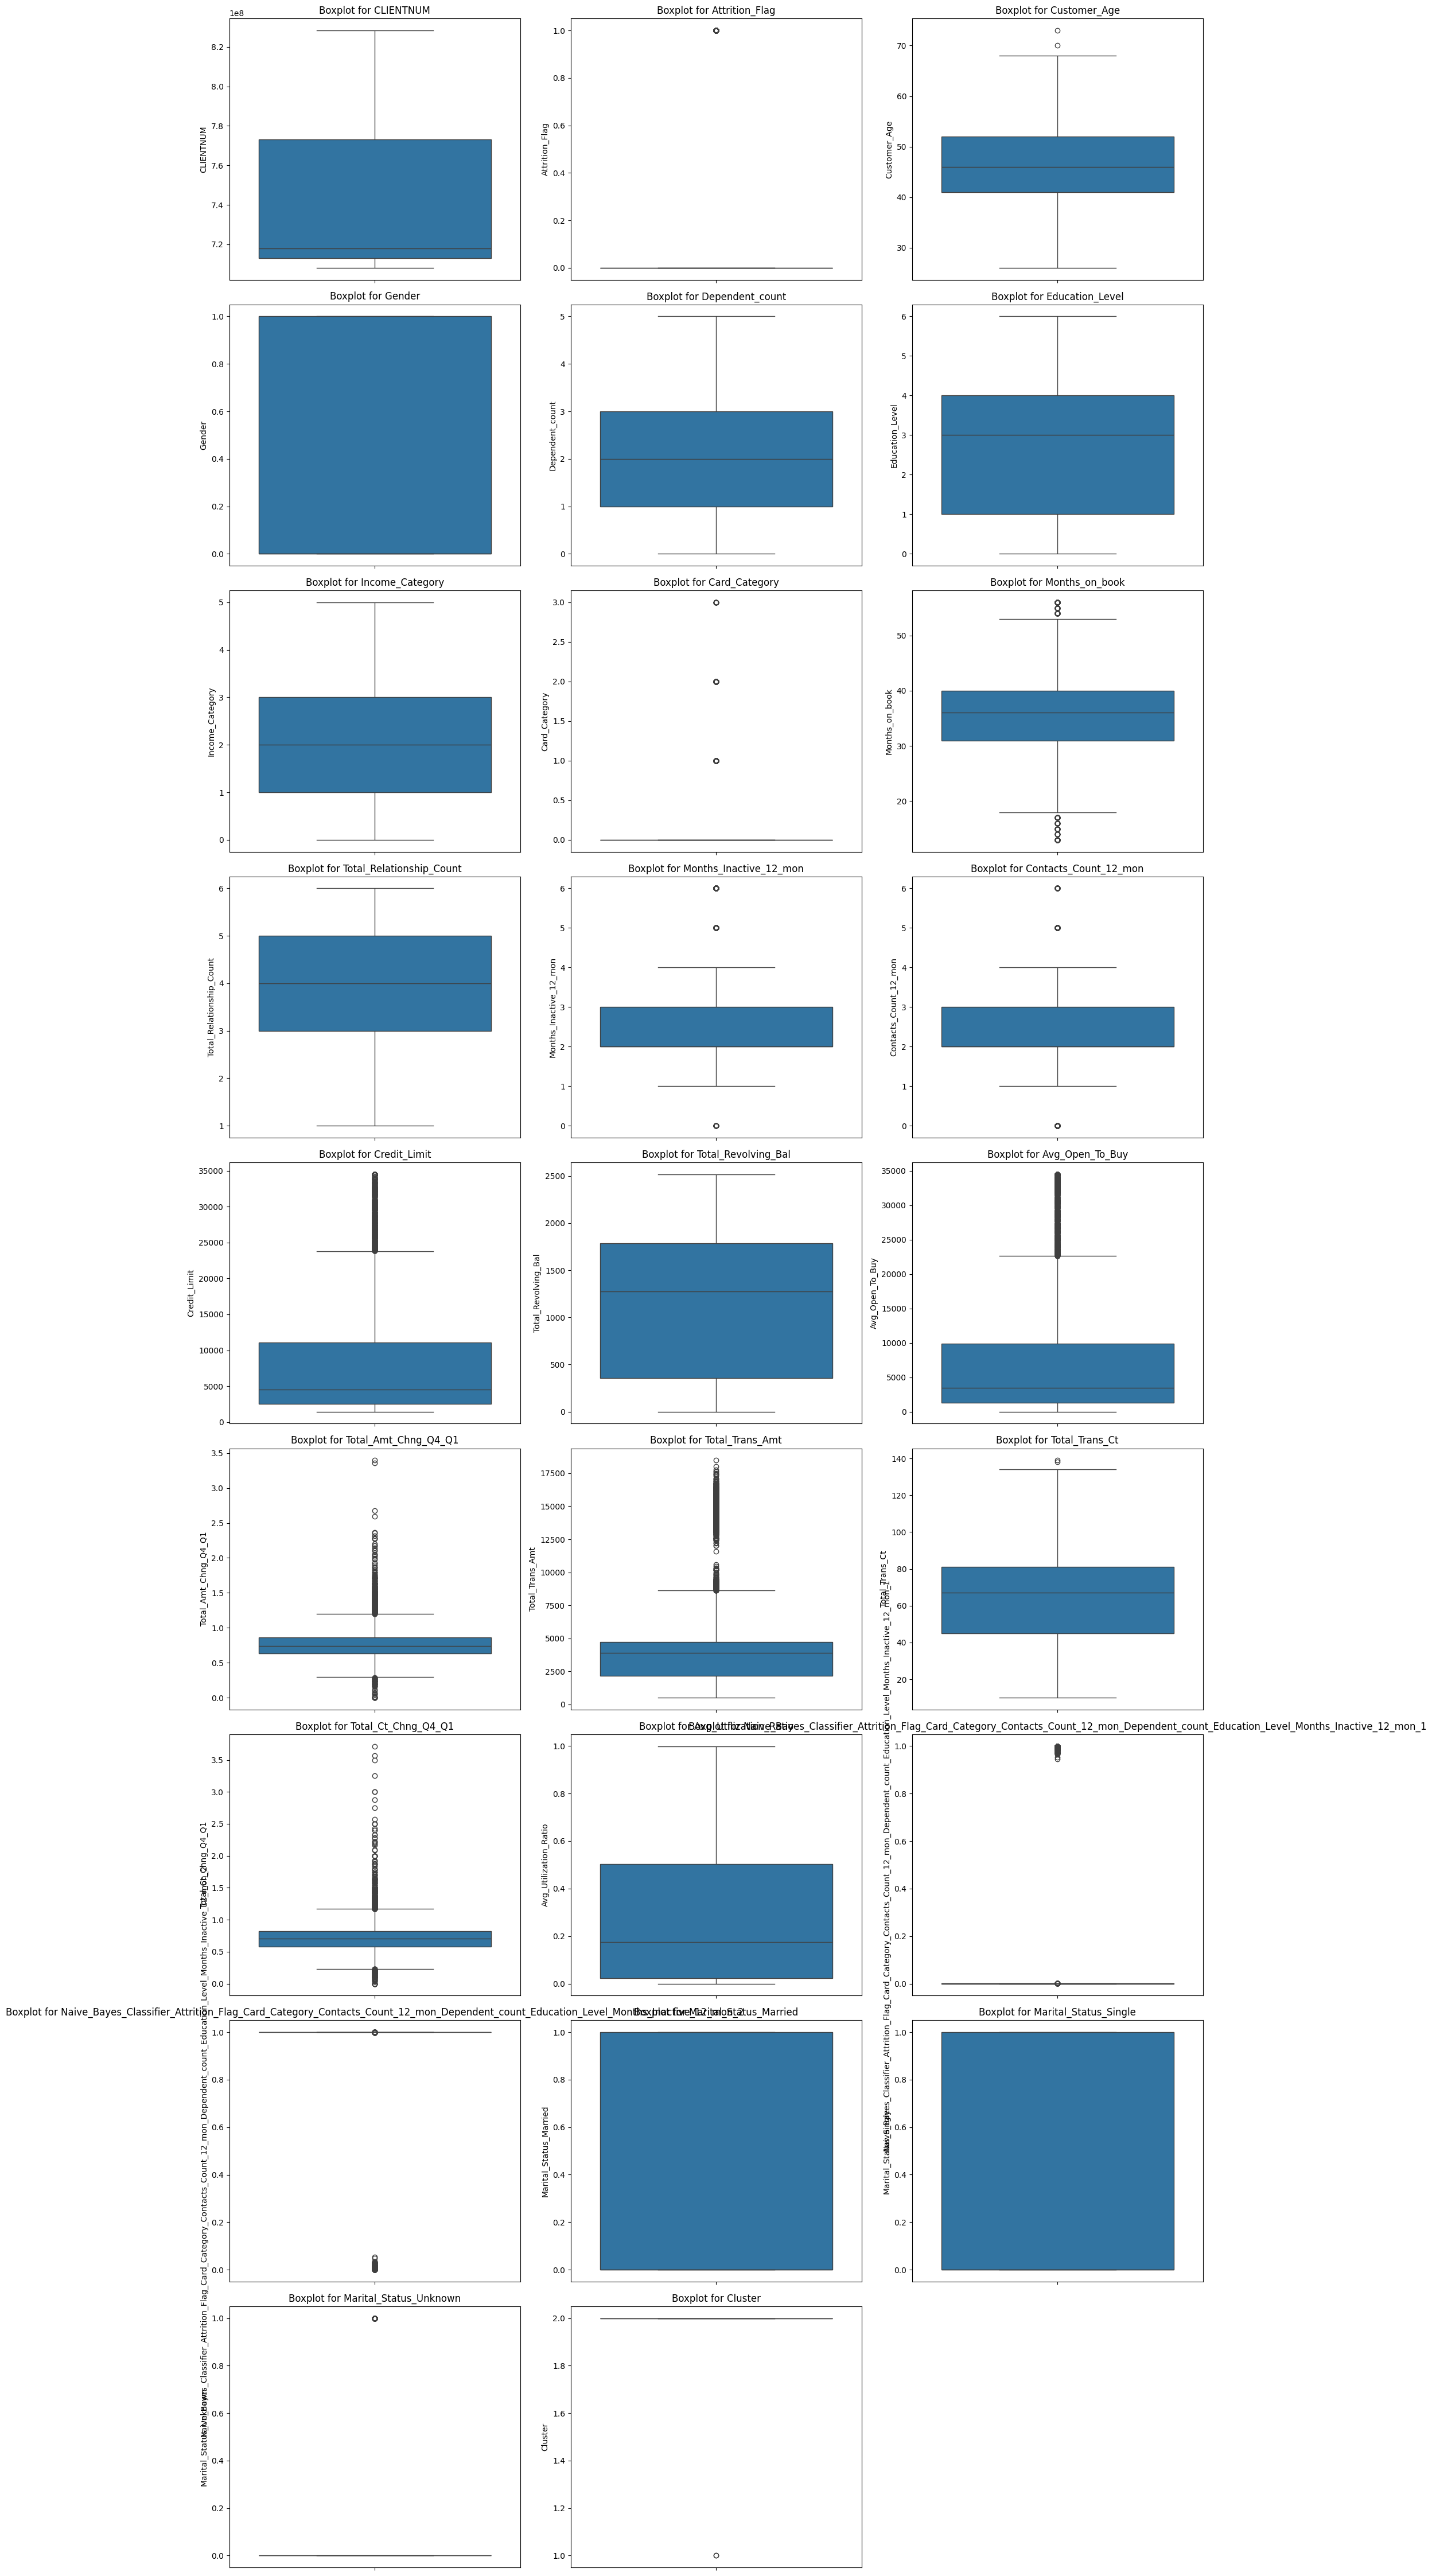

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings

warnings.filterwarnings('ignore', category=FutureWarning)

# 選擇數值型特徵
df_columns = df_one_hot.columns

# 設定畫布大小和子圖佈局
num_cols = 3  # 每行顯示的子圖數量
num_rows = (len(df_columns) + num_cols - 1) // num_cols  # 計算行數
plt.figure(figsize=(num_cols * 6, num_rows * 5))  # 動態調整圖表大小

# 繪製每個數值型特徵的箱型圖
for i, col in enumerate(df_columns, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.boxplot(y=col, data=df_one_hot)  # 移除 palette 參數
    plt.title(f'Boxplot for {col}')
    plt.tight_layout()

plt.show()

明顯有異常值欲處理的特徵為

Credit_Limit

Avg_Open_To_Buy

Total_Amt_Chng_Q4_Q1

Total_Trans_Amt

Total_Ct_Chng_Q4_Q1


### 利用對數轉換異常值，並使用 k-means 重新進行聚類

            CLIENTNUM  Attrition_Flag  Customer_Age    Gender  \
Cluster                                                         
0        7.352732e+08        1.000000     46.668512  0.428044   
1        7.397989e+08        0.000457     45.657991  0.824658   
2        7.407276e+08        0.000000     47.880511  0.767196   
3        7.395419e+08        0.000000     45.677962  0.130349   

         Dependent_count  Education_Level  Income_Category  Card_Category  \
Cluster                                                                     
0               2.402829         2.635301         2.038130       0.084256   
1               2.501370         2.616895         3.066667       0.302740   
2               2.140653         2.604056         2.779541       0.020723   
3               2.354687         2.579273         1.184269       0.000000   

         Months_on_book  Total_Relationship_Count  ...  Total_Amt_Chng_Q4_Q1  \
Cluster                                            ...            

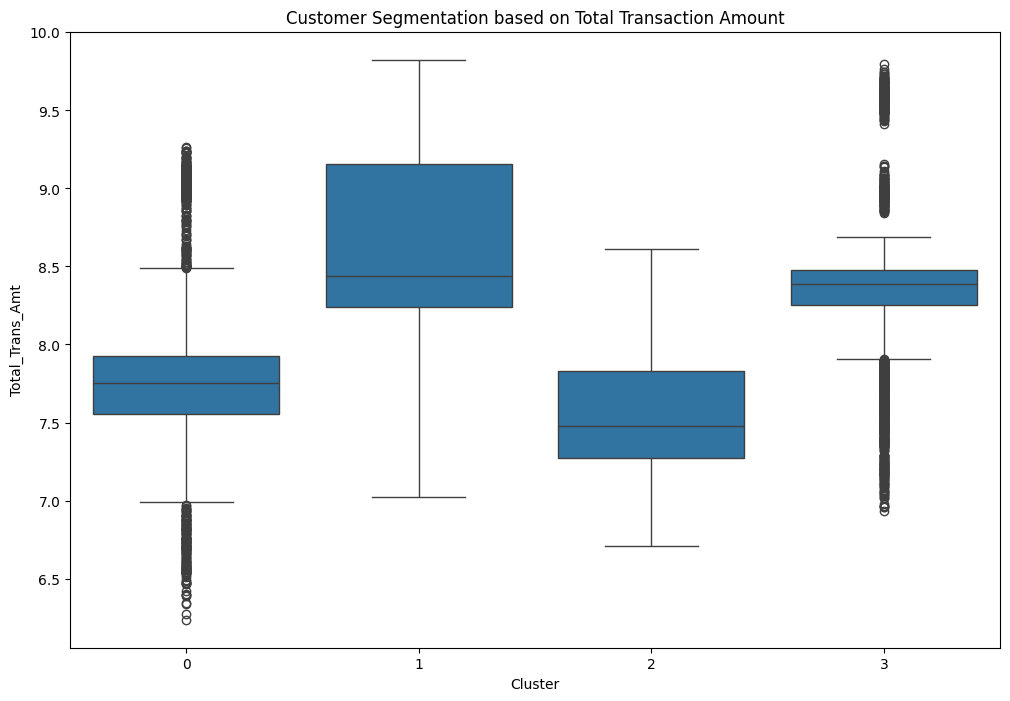

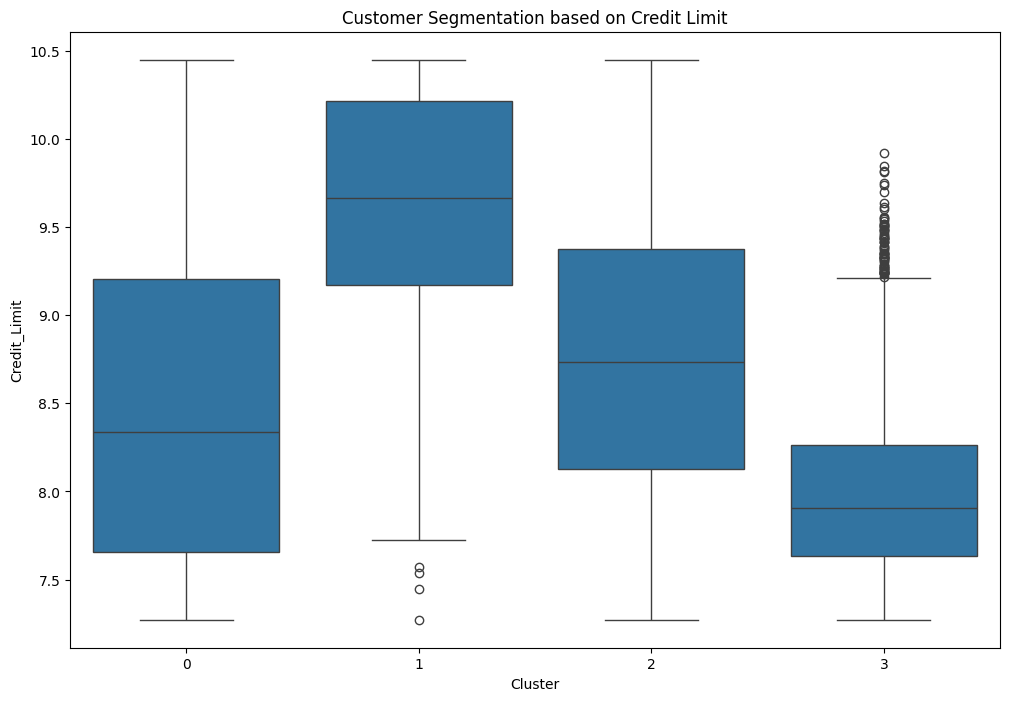

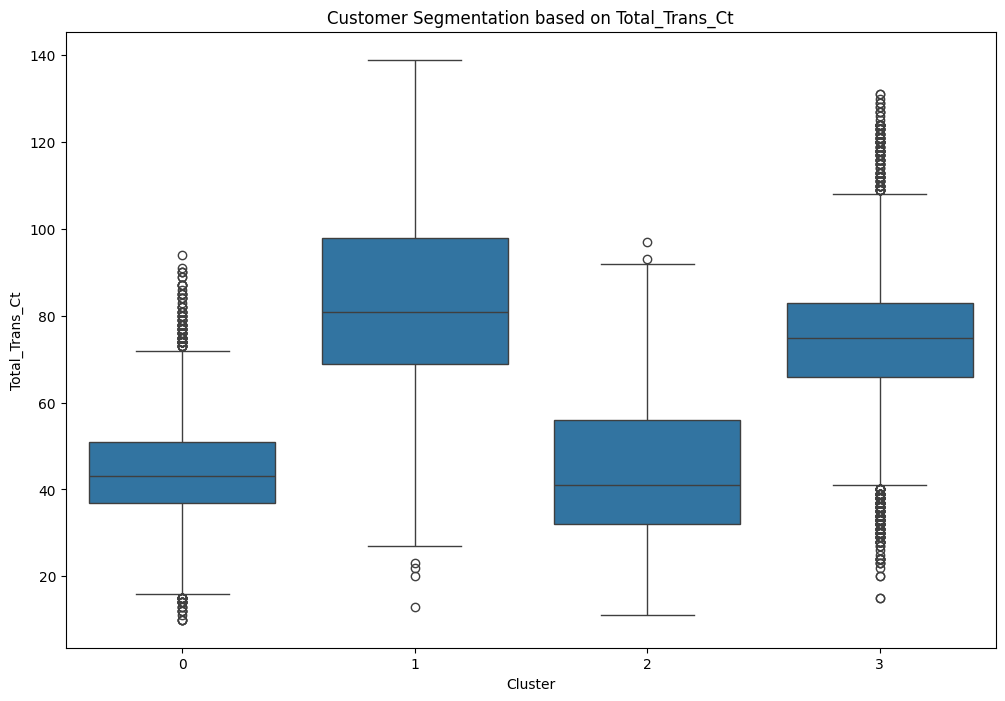

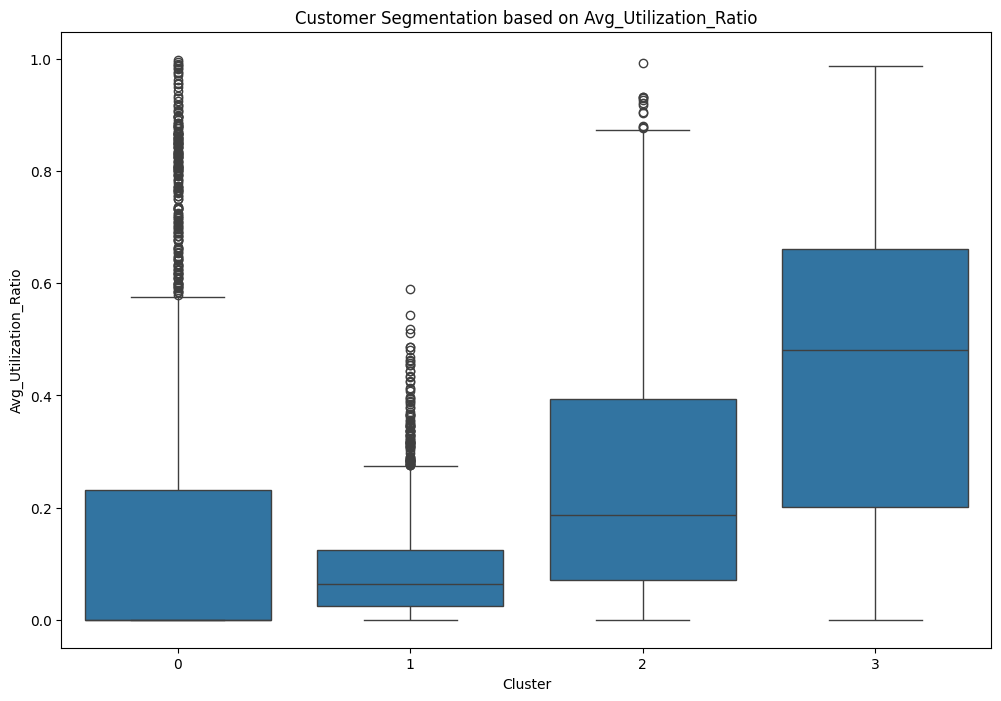

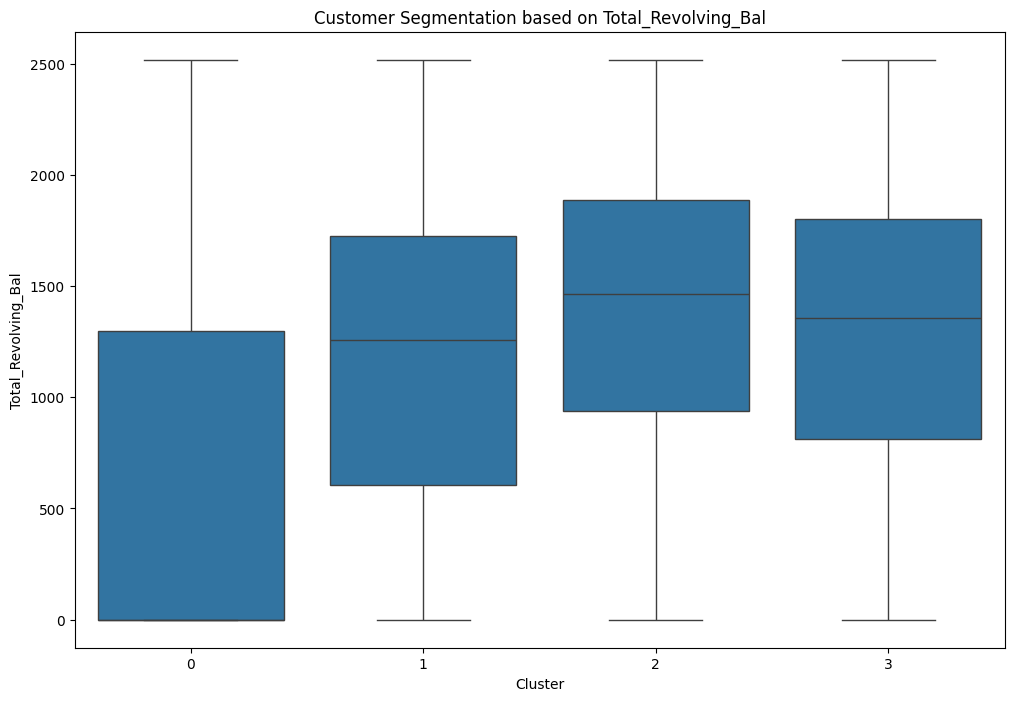

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# 選擇要進行對數轉換的特徵
features_to_log_transform = ['Credit_Limit', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Ct_Chng_Q4_Q1']

# 對選定的特徵進行對數轉換，並避免負數或零值出現
df_log_transformed = df_one_hot.copy()  # 保持原始資料
df_log_transformed[features_to_log_transform] = df_log_transformed[features_to_log_transform].apply(lambda x: np.log1p(x))

# 選擇除去 CLIENTNUM 以外的所有數值特徵進行 K-means 聚類
features = df_log_transformed.drop(columns=['CLIENTNUM']).columns
X = df_log_transformed[features]

# 標準化數據
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 使用 K-means 進行聚類，假設選擇 4 個群集
kmeans = KMeans(n_clusters=4, random_state=42)
df_log_transformed['Cluster'] = kmeans.fit_predict(X_scaled)

# 分析每個群集的特徵
cluster_analysis = df_log_transformed.groupby('Cluster').mean()

# 顯示結果
print(cluster_analysis)

# 可視化每個群體的重要特徵差異
plt.figure(figsize=(12,8))
sns.boxplot(x='Cluster', y='Total_Trans_Amt', data=df_log_transformed)  # 總交易金額
plt.title('Customer Segmentation based on Total Transaction Amount')
plt.show()

plt.figure(figsize=(12,8))
sns.boxplot(x='Cluster', y='Credit_Limit', data=df_log_transformed)
plt.title('Customer Segmentation based on Credit Limit')  # 信用卡額度
plt.show()

plt.figure(figsize=(12,8))
sns.boxplot(x='Cluster', y='Total_Trans_Ct', data=df_log_transformed)  # 總交易次數
plt.title('Customer Segmentation based on Total_Trans_Ct')
plt.show()

plt.figure(figsize=(12,8))
sns.boxplot(x='Cluster', y='Avg_Utilization_Ratio', data=df_log_transformed)  # 信用卡使用比率
plt.title('Customer Segmentation based on Avg_Utilization_Ratio')
plt.show()

plt.figure(figsize=(12,8))
sns.boxplot(x='Cluster', y='Total_Revolving_Bal', data=df_log_transformed)  # 信用卡透支未償還金額
plt.title('Customer Segmentation based on Total_Revolving_Bal')
plt.show()

部份資料的異常值問題獲得明顯的改善，

仍然有許多資料的異常值存在，但被調整為了常態分佈

### 檢查 k-means 的輪廓係數

In [ ]:
# 計算輪廓係數
# 定義測試的 K 值範圍
k_values = [3, 4, 5]

# 遍歷每個 K 值
for k in k_values:
    # 使用 KMeans 進行聚類
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)

    # 計算輪廓係數
    silhouette_avg = silhouette_score(X_scaled, kmeans.labels_)

    # 輸出結果
    print(f"For n_clusters = {k}, the average silhouette_score is : {silhouette_avg}")

For n_clusters = 3, the average silhouette_score is : 0.13588632926490493
For n_clusters = 4, the average silhouette_score is : 0.1163590481406514
For n_clusters = 5, the average silhouette_score is : 0.1002794124784464


輪廓係數比未處理異常值的 k-means 還要更低，

判斷異常值可能包含有用資訊，它們可能代表某些特定的群體或有價值的數據點。當去除或轉換這些異常值時，可能損失一些能夠幫助聚類的資訊。

對此，判斷聚類成效多次嘗試優化都效果不彰，是特徵數量過多又過於複雜，

接下來預計先定義群集目標，選定目標特徵，再針對目標特徵做群集。

## 群集目標：高價值客戶 vs 低價值客戶

目標將客戶分群為高價值客戶與低價值客戶，這類客戶可能在信用卡使用、總交易金額、信用額度、總交易次數等方面具有顯著差異，透過有效分群，能幫助我們在營銷決策上做出更精準的決策

特徵選擇：

1. Total_Trans_Amt（總交易金額）
2. Credit_Limit（信用額度）
3. Avg_Utilization_Ratio（平均信用額度利用率）
4. Total_Trans_Ct（總交易次數）

### 利用 k-means 來進行聚類並測試輪廓係數

In [ ]:

# 選擇特徵列表
features = [
    'Total_Trans_Amt',
    'Credit_Limit',
    'Avg_Utilization_Ratio',
    'Total_Trans_Ct',
]

# 複製資料，避免對原始數據進行更改
df_kmeans = df_one_hot[features].copy()

# 標準化數據
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_kmeans)

# 計算輪廓係數
# 定義測試的 K 值範圍
k_values = [2, 3, 4, 5]

# 遍歷每個 K 值
for k in k_values:
    # 使用 KMeans 進行聚類
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)

    # 計算輪廓係數
    silhouette_avg = silhouette_score(X_scaled, kmeans.labels_)

    # 輸出結果
    print(f"For n_clusters = {k}, the average silhouette_score is : {silhouette_avg}")

For n_clusters = 2, the average silhouette_score is : 0.4174599193693303
For n_clusters = 3, the average silhouette_score is : 0.35027899647496397
For n_clusters = 4, the average silhouette_score is : 0.36677040553489726
For n_clusters = 5, the average silhouette_score is : 0.38037299540325037


效果顯著優於利用整體資料來進行聚類，嘗試使用其它聚類方法進行聚類來確認是否有更好的結果

## 利用 DBSCAN 進行聚類

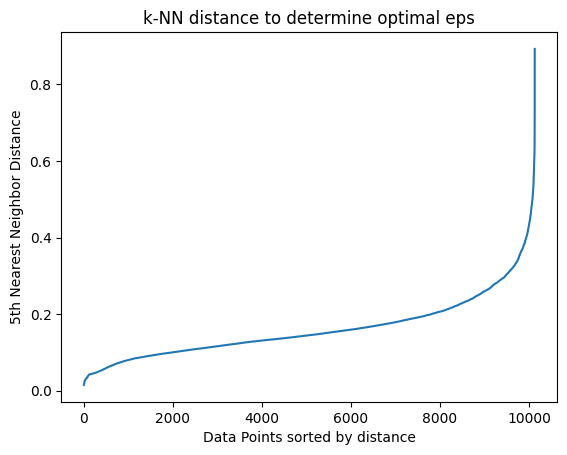

In [ ]:
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

# 選擇特徵
features = ['Total_Trans_Amt', 'Credit_Limit', 'Avg_Utilization_Ratio', 'Total_Trans_Ct']

# 從資料集中選擇特定的特徵
X = df_one_hot[features]

# 標準化數據
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 設定最近鄰居的個數為 min_samples
neighbors = NearestNeighbors(n_neighbors=5)  # 這裡設定 min_samples = 5
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)

# 排序距離
distances = np.sort(distances[:, 4], axis=0)  # 取第5個鄰居的距離（min_samples - 1）
plt.plot(distances)
plt.ylabel('5th Nearest Neighbor Distance')
plt.xlabel('Data Points sorted by distance')
plt.title('k-NN distance to determine optimal eps')
plt.show()


首先找到適合的 eps = 0.4

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns


# 設定 DBSCAN 的參數
# eps 是鄰域的最大距離，min_samples 是每個群集的最小點數
dbscan = DBSCAN(eps=0.4, min_samples=6)

# 執行聚類
dbscan_labels = dbscan.fit_predict(X_scaled)

# 檢查聚類結果中有多少群集（-1 表示噪音點）
unique_labels = np.unique(dbscan_labels)
print(f"DBSCAN identified {len(unique_labels)} clusters, including noise points (label -1).")

# 計算輪廓係數 (排除噪音點即 label 為 -1 的點)
if len(set(dbscan_labels)) > 1:  # 確保存在多於一個群集
    silhouette_avg = silhouette_score(X_scaled[dbscan_labels != -1], dbscan_labels[dbscan_labels != -1])
    print(f"The silhouette score for DBSCAN is : {silhouette_avg}")
else:
    print("DBSCAN 未能成功找到有效群集，請嘗試調整 eps 和 min_samples 參數。")


DBSCAN identified 3 clusters, including noise points (label -1).
The silhouette score for DBSCAN is : 0.494804978337349


當 eps=0.4, min_samples=6 時，輪廓係數達到 0.49 ，聚類質量較可接受

Cluster Analysis (Selected Features):
         Total_Trans_Amt  Credit_Limit  Avg_Utilization_Ratio  Total_Trans_Ct
Cluster                                                                      
-1          10554.333333  15098.107143               0.152512       82.130952
 0           3561.486762   8153.150402               0.283249       61.199700
 1          14689.787115  14127.190476               0.180123      110.634454


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


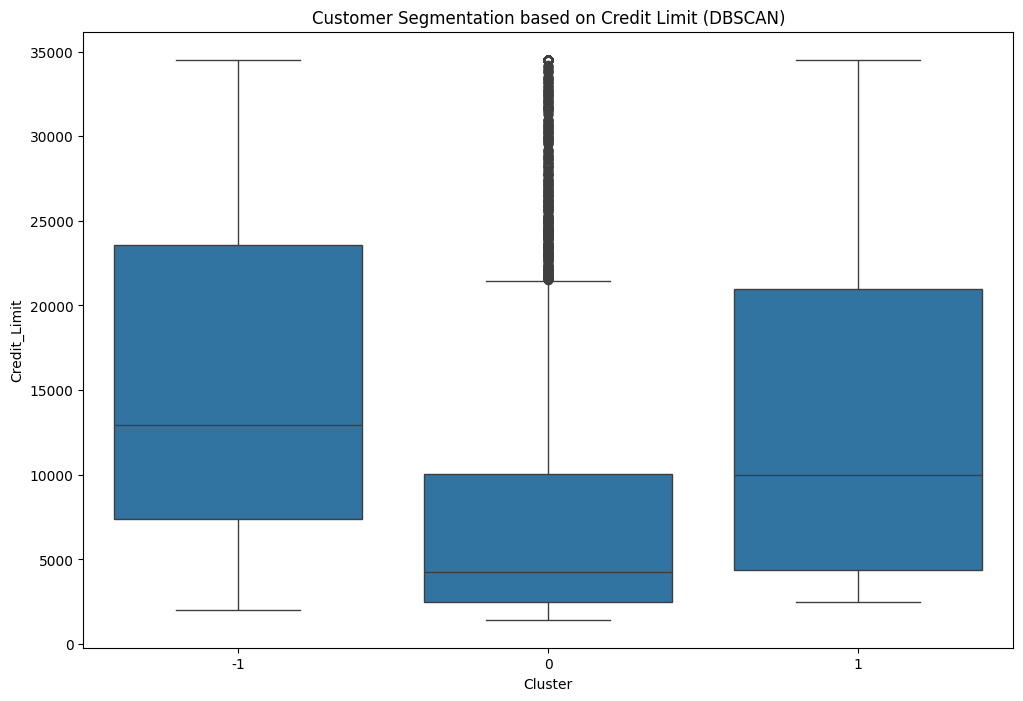

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


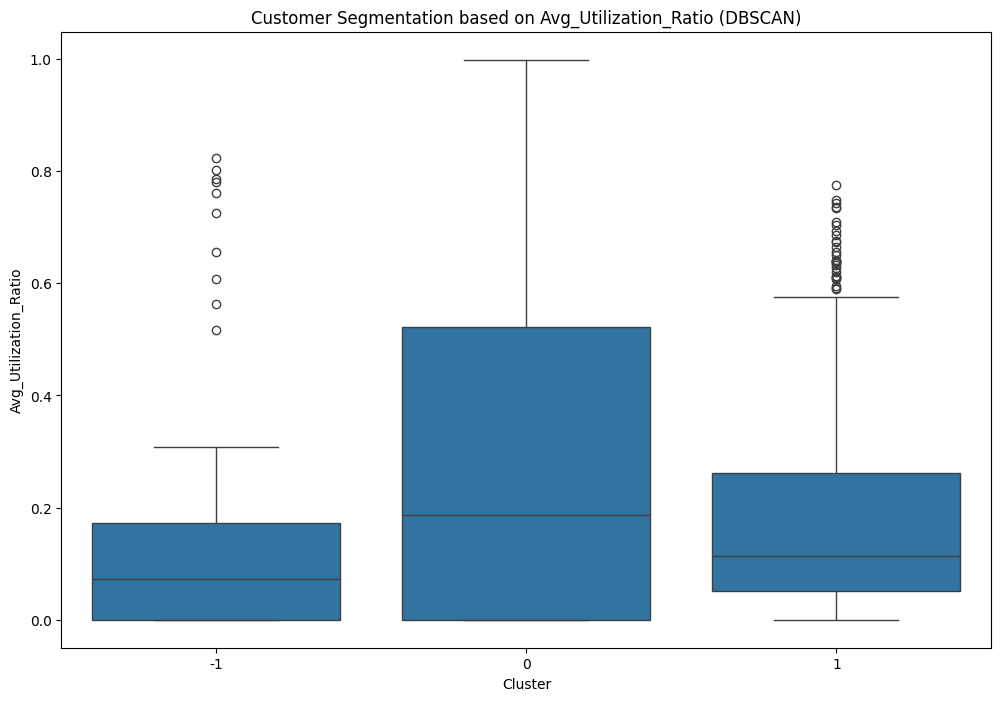

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


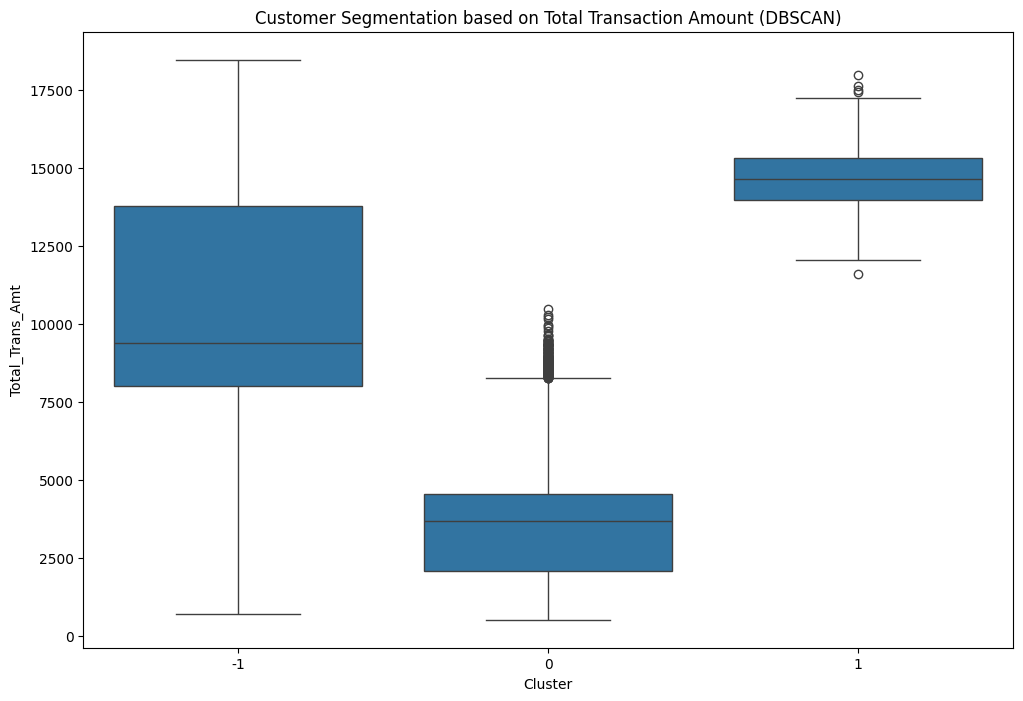

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


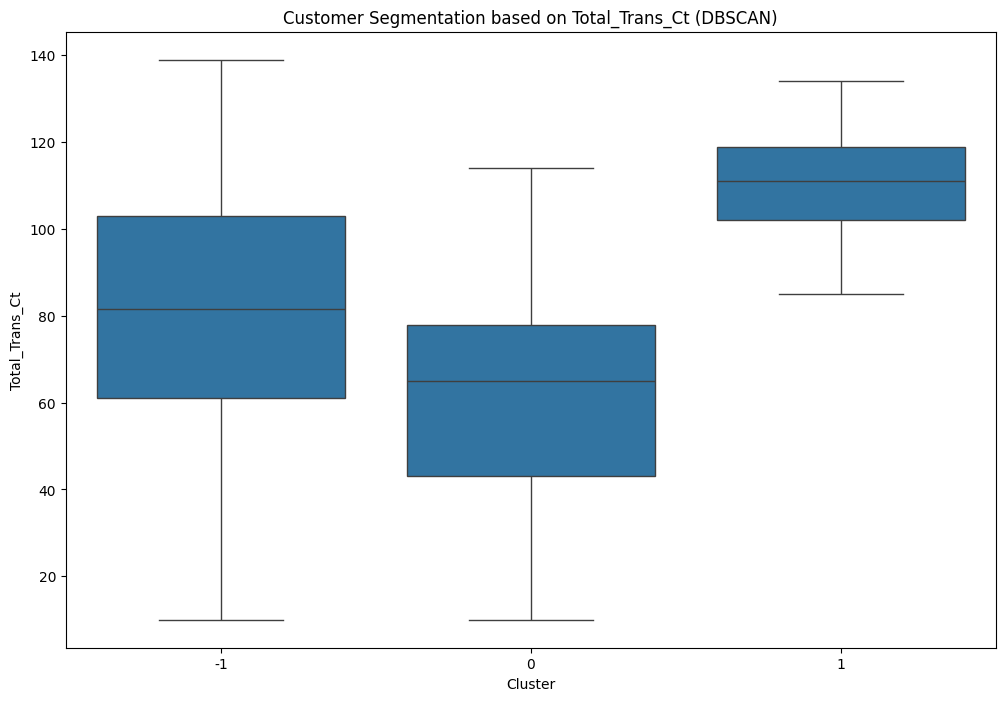

Cluster Size and Proportion:
         Cluster Count  Percentage
Cluster                           
 0                9329   92.120075
 1                 714    7.050459
-1                  84    0.829466


In [ ]:
# 將聚類結果加入到原始資料中
df_one_hot['Cluster'] = dbscan_labels

# 計算每個群集的特徵均值，只保留選擇的四個特徵
cluster_analysis = df_one_hot.groupby('Cluster')[['Total_Trans_Amt', 'Credit_Limit', 'Avg_Utilization_Ratio', 'Total_Trans_Ct']].mean()

print("Cluster Analysis (Selected Features):")
print(cluster_analysis)


# 可視化 Credit_Limit 在不同群集中的分佈
plt.figure(figsize=(12,8))
sns.boxplot(x='Cluster', y='Credit_Limit', data=df_one_hot)
plt.title('Customer Segmentation based on Credit Limit (DBSCAN)')
plt.show()

# 可視化 Avg_Utilization_Ratio 在不同群集中的分佈
plt.figure(figsize=(12,8))
sns.boxplot(x='Cluster', y='Avg_Utilization_Ratio', data=df_one_hot)
plt.title('Customer Segmentation based on Avg_Utilization_Ratio (DBSCAN)')
plt.show()

# 可視化 Total_Trans_Amt 在不同群集中的分佈
plt.figure(figsize=(12,8))
sns.boxplot(x='Cluster', y='Total_Trans_Amt', data=df_one_hot)
plt.title('Customer Segmentation based on Total Transaction Amount (DBSCAN)')
plt.show()

# 可視化 Total_Trans_Ct 在不同群集中的分佈
plt.figure(figsize=(12,8))
sns.boxplot(x='Cluster', y='Total_Trans_Ct', data=df_one_hot)
plt.title('Customer Segmentation based on Total_Trans_Ct (DBSCAN)')
plt.show()

# 顯示結果中各群集的大小和比例
cluster_counts = df_one_hot['Cluster'].value_counts()
total_count = len(df_one_hot)
cluster_percentage = (cluster_counts / total_count) * 100
result = pd.DataFrame({'Cluster Count': cluster_counts, 'Percentage': cluster_percentage})
print("Cluster Size and Proportion:")
print(result)

**高價值客戶群（Cluster 1）(714 筆資料)：**

這群客戶交易頻繁且額度高，可以針對這些客戶提供高額獎勵或專屬優惠，以鼓勵他們增加更多使用和忠誠度。
專屬信用卡產品針對這群客戶，如更高的信用卡額度或優惠回饋計畫。

**中低價值客戶群（Cluster 0）(9329 筆資料)：**

這群客戶的交易額較低，且使用頻率較少，銀行可以針對這些客戶提供消費回饋計畫，吸引他們更多使用信用卡，或者提升信用額度以刺激更多交易。
提供教育或促銷信息，鼓勵這些客戶了解如何最大化信用卡的使用價值。

**噪音點（Cluster -1）(84 筆資料)：**

這些客戶可能較為特殊，銀行可以進一步分析這群客戶是否具有異常特徵，或者是否有機會進行個性化推廣。

In [ ]:
# 匯出客戶名單，以利後續使用
df_clusters = df_one_hot[['CLIENTNUM', 'Cluster']]
df_clusters.head()

,CLIENTNUM,Cluster
0,768805383,0
1,818770008,0
2,713982108,0
3,769911858,0
4,709106358,0


# 主題二、信用額度優化（Credit Limit Optimization）

目的：根據客戶的信用卡使用行為來優化他們的信用額度，使得信用卡公司能夠平衡風險與收入。

預期應用情境：

1. 降低信用風險：透過分析客戶的使用行為，企業可以適時調整客戶的信用額度，減少信用風險。

2. 增加信用卡使用率：對信用評級高的客戶調整額度，有助於提高客戶的消費力和信用卡的使用頻率，進一步增加企業的收入。


進行方法： 信用額度優化將會透過以下步驟來進行信用額度優化分析

1. 信用額度客戶分群

  對客戶進行分群，根據每一群體的特徵，確定哪一群客戶的信用額度需要提升或降低。這有助於針對不同的客戶制定不同的優化策略。

2. 信用額度風險評估

  使用信用額度利用率（Avg_Utilization_Ratio）以及自定義評估指標，來評估每個客戶是否需要調整信用額度，會將客戶大致分為「高風險」、「中等風險」、「低風險」等族群


3. 模型構建

  構建機器學習模型來預測最合適的信用額度。

5. 建立優化策略

  綜合以上結果，做出可行的商業決策，幫助公司平衡風險與提升收入


## 1. 信用額度的客戶分群

### 沿用主題一顧客分群的最終結果，將中低價值客戶群（Cluster 0）的客戶做二次分群

中低價值客戶群（Cluster 0）總共有 9329 筆資料，佔整體資料的 92% ，為了更謹慎的做出信用額度調整策略，將 Cluster 0 資料再次做出分群

In [ ]:
from sklearn.cluster import KMeans

# 選擇 Cluster = 0 的資料
cluster_0_data = df_one_hot[df_one_hot['Cluster'] == 0]

# 提取相同的特徵進行再次聚類
X_cluster_0 = cluster_0_data[features]  # 使用之前選擇的四個特徵

# 標準化數據
scaler = StandardScaler()
X_cluster_0_scaled = scaler.fit_transform(X_cluster_0)

# 使用 K-means 將資料分為兩群
kmeans = KMeans(n_clusters=2, random_state=42)
cluster_0_labels = kmeans.fit_predict(X_cluster_0_scaled)

# 計算輪廓係數
silhouette_avg = silhouette_score(X_cluster_0_scaled, cluster_0_labels)
print(f"The silhouette score for K-means with 2 clusters is: {silhouette_avg}")

The silhouette score for K-means with 2 clusters is: 0.3298149882645958


由於是從已經分群過後的群集再次分群，輪廓係數 0.32 還算能接受

In [ ]:
# 創建新的 Series，將 K-means 標籤與原始索引對應
cluster_0_labels_series = pd.Series(cluster_0_labels, index=cluster_0_data.index)

# 將新的 K-means 群集標籤加入到原始資料中
df_one_hot.loc[cluster_0_labels_series.index, 'Cluster'] = 'Cluster_0_Kmeans_' + cluster_0_labels_series.astype(str)

# 檢查更新後的資料
print(df_one_hot['Cluster'].value_counts())

Cluster
Cluster_0_Kmeans_0    5318
Cluster_0_Kmeans_1    4011
1                      714
-1                      84
Name: count, dtype: int64


<ipython-input-8-6f44d7596d5d>:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '['Cluster_0_Kmeans_1' 'Cluster_0_Kmeans_1' 'Cluster_0_Kmeans_1' ...
 'Cluster_0_Kmeans_0' 'Cluster_0_Kmeans_0' 'Cluster_0_Kmeans_0']' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_one_hot.loc[cluster_0_labels_series.index, 'Cluster'] = 'Cluster_0_Kmeans_' + cluster_0_labels_series.astype(str)


In [ ]:
# 進行群集的分析
cluster_analysis = df_one_hot.groupby('Cluster')[features].mean()
print("Cluster Analysis after K-means (on Cluster 0):")
print(cluster_analysis)

Cluster Analysis after K-means (on Cluster 0):
                    Total_Trans_Amt  Credit_Limit  Avg_Utilization_Ratio  \
Cluster                                                                    
-1                     10554.333333  15098.107143               0.152512   
1                      14689.787115  14127.190476               0.180123   
Cluster_0_Kmeans_0      4761.042497   7666.798345               0.307178   
Cluster_0_Kmeans_1      1971.051109   8797.982174               0.251523   

                    Total_Trans_Ct  
Cluster                             
-1                       82.130952  
1                       110.634454  
Cluster_0_Kmeans_0       76.097593  
Cluster_0_Kmeans_1       41.447270  


**最高價值客戶群（Cluster 1）(714 筆資料)：**

最重要的高價值客戶群體，他們的交易額大、交易頻繁且信用額度高，應該繼續重點維護這群客戶。

**忠誠客戶群（Cluster_0_Kmeans_0）(5318 筆資料)：**

客戶信用額度不高，但使用頻繁，交易金額相對較大，建議適度提高他們的信用額度，促進他們更多的交易行為。

**不忠誠潛力客戶群（Cluster_0_Kmeans_1）(4011 筆資料)：**

客戶則可能對信用卡的依賴不高，但他們擁有較高的信用額度，應考慮如何激發他們的使用需求。

**噪音點（Cluster -1）(84 筆資料)：**

噪音點代表可能有異常行為的客戶，需要進行額外的分析，判斷這些客戶是否存在較高的信用風險或有欺詐行為，必要時可進行信用額度的限制或調整。

## 2. 信用額度風險評估


#### 定義風險閾值

**最高價值客戶群（Cluster 1）**

High Risk：
Avg_Utilization_Ratio > 0.5

Low Risk：
Avg_Utilization_Ratio < 0.3
and  Total_Trans_Am > 14689 (總消費金額大於平均值)

Medium Risk：
else


**忠誠客戶群（Cluster_0_Kmeans_0）**

High Risk：
Avg_Utilization_Ratio > 0.5

Low Risk：
Avg_Utilization_Ratio < 0.3
and  Total_Trans_Am > 4761 (總消費金額大於平均值)

Medium Risk：
else


**不忠誠潛力客戶群（Cluster_0_Kmeans_1）**

High Risk：
Avg_Utilization_Ratio > 0.5

Low Risk：
Avg_Utilization_Ratio < 0.3
and  Total_Trans_Am > 1971 (總消費金額大於平均值)

Medium Risk：
else

In [ ]:
def risk_assessment(row):
    # Cluster 1 的風險評估
    if row['Cluster'] == 1:
        if row['Avg_Utilization_Ratio'] > 0.5:
            return 'High Risk'
        elif row['Avg_Utilization_Ratio'] < 0.3 and row['Total_Trans_Amt'] > 14689:  # 最高價值客戶群（Cluster 1） Total_Trans_Amt 平均值 = 14689
            return 'Low Risk'
        else:
            return 'Medium Risk'

    # Cluster_0_Kmeans_0 的風險評估
    elif row['Cluster'] == 'Cluster_0_Kmeans_0':
        if row['Avg_Utilization_Ratio'] > 0.5:
            return 'High Risk'
        elif row['Avg_Utilization_Ratio'] < 0.3 and row['Total_Trans_Amt'] > 4761:  # 忠誠客戶群（Cluster_0_Kmeans_0） Total_Trans_Amt 平均值 = 4761
            return 'Low Risk'
        else:
            return 'Medium Risk'

    # Cluster_0_Kmeans_1 的風險評估
    elif row['Cluster'] == 'Cluster_0_Kmeans_1':
        if row['Avg_Utilization_Ratio'] > 0.5:
            return 'High Risk'
        elif row['Avg_Utilization_Ratio'] < 0.3 and row['Total_Trans_Amt'] > 1971:  # 不忠誠潛力客戶群（Cluster_0_Kmeans_1） Total_Trans_Amt 平均值 = 1971
            return 'Low Risk'
        else:
            return 'Medium Risk'

    # 如果資料不屬於任何預期的群集
    else:
        return 'Unknown Risk'

# 將風險評估邏輯應用到數據集
df_one_hot['Risk_Assessment'] = df_one_hot.apply(risk_assessment, axis=1)

# 查看風險評估結果
print(df_one_hot[['Cluster', 'Avg_Utilization_Ratio', 'Total_Trans_Amt', 'Risk_Assessment']].head())


              Cluster  Avg_Utilization_Ratio  Total_Trans_Amt Risk_Assessment
0  Cluster_0_Kmeans_1                  0.061             1144     Medium Risk
1  Cluster_0_Kmeans_1                  0.105             1291     Medium Risk
2  Cluster_0_Kmeans_1                  0.000             1887     Medium Risk
3  Cluster_0_Kmeans_1                  0.760             1171       High Risk
4  Cluster_0_Kmeans_1                  0.000              816     Medium Risk


根據定義的風險閾值，依照分群結果，進行風險評估，決策的大方向可參考


高風險客戶： 如有必要，減少他們的信用額度，或增加監控措施。

中風險客戶： 維持信用額度，並定期跟蹤消費行為。

低風險客戶： 增加信用額度，並提供額外優惠來提高忠誠度。

#### 計算每個風險級別的分佈情況

In [ ]:
# 計算每個群集下不同風險評級的數量
risk_counts = df_one_hot.groupby(['Cluster', 'Risk_Assessment']).size().reset_index(name='Count')

# 計算每個群集的總數
total_counts = df_one_hot['Cluster'].value_counts().reset_index()
total_counts.columns = ['Cluster', 'Total']

# 合併總數到風險評估結果中
risk_counts = pd.merge(risk_counts, total_counts, on='Cluster')

# 計算風險評級在每個群集中的比例
risk_counts['Percentage'] = (risk_counts['Count'] / risk_counts['Total']) * 100

# 顯示結果
risk_counts


,Cluster,Risk_Assessment,Count,Total,Percentage
0,-1,Unknown Risk,84,84,100.000000
1,1,High Risk,52,714,7.282913
2,1,Low Risk,280,714,39.215686
3,1,Medium Risk,382,714,53.501401
4,Cluster_0_Kmeans_0,High Risk,1609,5318,30.255735
5,Cluster_0_Kmeans_0,Low Risk,995,5318,18.710041
6,Cluster_0_Kmeans_0,Medium Risk,2714,5318,51.034223
7,Cluster_0_Kmeans_1,High Risk,874,4011,21.790077
8,Cluster_0_Kmeans_1,Low Risk,1276,4011,31.812516
9,Cluster_0_Kmeans_1,Medium Risk,1861,4011,46.397407


每個類別，撇除待持續追蹤觀察的中風險客戶，都有將近40%~50%左右的資料落在高風險客戶與低風險客戶中，判斷定義的風險閾值將數據切分的還算平均，讓我們有更多的優化空間可以進行操作

## 3. 模型建構，預測最合適的信用額度

### 選擇特徵並做欄位轉換

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 選擇與信用額度預測相關的特徵
features = ['Avg_Utilization_Ratio', 'Total_Trans_Amt', 'Total_Trans_Ct',
            'Income_Category', 'Customer_Age', 'Months_on_book',
            'Gender', 'Education_Level', 'Dependent_count',
            'Marital_Status_Married', 'Marital_Status_Single', 'Marital_Status_Unknown',
            'Card_Category', 'Total_Revolving_Bal',
            'Cluster', 'Risk_Assessment']


# 確保 Cluster 欄位中的值都轉換為字串格式
df_one_hot['Cluster'] = df_one_hot['Cluster'].astype(str)

# 定義欄位及其類別順序
ordinal_cols2 = ['Cluster', 'Risk_Assessment']

# 指定每個欄位的類別順序
ordinal_categories2 = [
    ['-1', '1', 'Cluster_0_Kmeans_0', 'Cluster_0_Kmeans_1'],  # Cluster
    ['Unknown Risk', 'High Risk', 'Medium Risk', 'Low Risk'],  # Risk_Assessment
]

# 創建 OrdinalEncoder 並指定順序
ordinal_encoder2 = OrdinalEncoder(categories=ordinal_categories2)

# 對資料進行有序編碼
df_one_hot[ordinal_cols2] = ordinal_encoder2.fit_transform(df_one_hot[ordinal_cols2])

# 將 Cluster 欄位從 object 轉換為 float64
df_one_hot['Cluster'] = df_one_hot['Cluster'].astype('float64')
df_one_hot


,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,...,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown,Cluster,Risk_Assessment
0,768805383,0.0,45,1.0,3,2.0,3.0,0.0,39,5,...,42,1.625,0.061,0.000093,0.999910,True,False,False,3.0,2.0
1,818770008,0.0,49,0.0,5,4.0,1.0,0.0,44,6,...,33,3.714,0.105,0.000057,0.999940,False,True,False,3.0,2.0
2,713982108,0.0,51,1.0,3,4.0,4.0,0.0,36,4,...,20,2.333,0.000,0.000021,0.999980,True,False,False,3.0,2.0
3,769911858,0.0,40,0.0,4,2.0,1.0,0.0,34,3,...,20,2.333,0.760,0.000134,0.999870,False,False,True,3.0,1.0
4,709106358,0.0,40,1.0,3,1.0,3.0,0.0,21,5,...,28,2.500,0.000,0.000022,0.999980,True,False,False,3.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,0.0,50,1.0,2,4.0,2.0,0.0,40,3,...,117,0.857,0.462,0.000191,0.999810,False,True,False,1.0,2.0
10123,710638233,1.0,41,1.0,2,0.0,2.0,0.0,25,4,...,69,0.683,0.511,0.995270,0.004729,False,False,False,2.0,1.0
10124,716506083,1.0,44,0.0,1,2.0,1.0,0.0,36,5,...,60,0.818,0.000,0.997880,0.002118,True,False,False,2.0,3.0
10125,717406983,1.0,30,1.0,2,4.0,2.0,0.0,36,4,...,62,0.722,0.000,0.996710,0.003294,False,False,True,2.0,3.0


### 使用線性回歸（Linear Regression）來建模

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 目標變數是 Credit_Limit
X = df_one_hot[features]
y = df_one_hot['Credit_Limit']

# 分割數據，80% 作為訓練集，20% 作為測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 初始化標準化工具
scaler = StandardScaler()

# 標準化訓練集和測試集
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



# 初始化線性回歸模型
linear_regressor = LinearRegression()

# 訓練模型
linear_regressor.fit(X_train_scaled, y_train)

# 使用測試集進行預測
y_pred = linear_regressor.predict(X_test_scaled)

# 計算均方誤差
mse = mean_squared_error(y_test, y_pred)

# 計算 R² 分數
r2 = r2_score(y_test, y_pred)

# 輸出結果
print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

Mean Squared Error: 33087740.235063944
R² Score: 0.6002772107174678


## 使用隨機森林回歸（RandomForestRegressor）來建模

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# 初始化隨機森林回歸模型
rf_regressor = RandomForestRegressor(random_state=42)

# 訓練模型
rf_regressor.fit(X_train_scaled, y_train)

# 使用測試集進行預測
y_pred_rf = rf_regressor.predict(X_test_scaled)

# 計算均方誤差和 R² 分數
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# 輸出結果
print(f"Random Forest - Mean Squared Error: {mse_rf}")
print(f"Random Forest - R² Score: {r2_rf}")


Random Forest - Mean Squared Error: 9369535.064804284
Random Forest - R² Score: 0.8868095353814717


RandomForestRegressor 的預測結果明顯優於 Linear Regression

R² Score: 0.886，這表示模型能夠解釋 88.6% 的目標變數（Credit_Limit）變異，表示模型的預測能力較強。

RMSE = MSE 開根號 = 9369535 開根號 = 3,060

Credit_Limit 的數值介於 1438 至 34516 之間，平均值是 8631，

RMSE 是 3,060，而 Credit_Limit 的平均值是 8,631。這意味著模型預測的平均誤差接近 35%（3,060/8,631）左右。

雖然這個誤差並不小，但考慮到目標變數的範圍從 1,438 到 34,516，這個誤差範圍是可以理解的。

Credit_Limit 數值範圍很大（1,438 至 34,516），RMSE 值佔據了目標變數範圍的一部分。RMSE 約佔據範圍的 10% 左右。對於這樣的數據範圍，這可能是一個相對合理的預測誤差，取決於業務允許的預測誤差範圍。


### 檢查模型泛化能力以及是否有過擬合問題

In [ ]:
from sklearn.model_selection import cross_val_score

# 使用交叉驗證檢查模型的泛化能力
scores = cross_val_score(rf_regressor, X_train_scaled, y_train, cv=5, scoring='r2')
print(f"Cross-validation R² scores: {scores}")

Cross-validation R² scores: [0.86881778 0.86363017 0.8740528  0.88377112 0.88959495]


使用交叉驗證來做分析，模型表現還算穩定

### 使用 GridSearchCV 找到模型最佳超參數

In [ ]:
from sklearn.model_selection import GridSearchCV

# 定義參數網格
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# 初始化隨機森林回歸模型
rf_regressor = RandomForestRegressor(random_state=42)

# 使用 GridSearchCV 進行超參數調整
grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=2, scoring='r2')

# 訓練模型
grid_search.fit(X_train_scaled, y_train)

# 輸出最佳參數
print(f"Best parameters: {grid_search.best_params_}")

# 使用最佳參數進行預測
best_rf = grid_search.best_estimator_
y_pred_best_rf = best_rf.predict(X_test_scaled)

# 評估最佳模型
mse_best_rf = mean_squared_error(y_test, y_pred_best_rf)
r2_best_rf = r2_score(y_test, y_pred_best_rf)
print(f"Best Random Forest - Mean Squared Error: {mse_best_rf}")
print(f"Best Random Forest - R² Score: {r2_best_rf}")


Fitting 3 folds for each of 216 candidates, totalling 648 fits
Best parameters: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Random Forest - Mean Squared Error: 8666529.913633868
Best Random Forest - R² Score: 0.895302323885899


## 使用梯度提升回歸 (Gradient Boosting) 來建模

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# 選擇與信用額度預測相關的特徵
features = ['Avg_Utilization_Ratio', 'Total_Trans_Amt', 'Total_Trans_Ct',
            'Income_Category', 'Customer_Age', 'Months_on_book',
            'Gender', 'Education_Level', 'Dependent_count',
            'Marital_Status_Married', 'Marital_Status_Single', 'Marital_Status_Unknown',
            'Card_Category', 'Total_Revolving_Bal',
            'Cluster', 'Risk_Assessment']

# 目標變數是 Credit_Limit
X = df_one_hot[features]
y = df_one_hot['Credit_Limit']

# 分割數據，80% 作為訓練集，20% 作為測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 標準化數據
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 初始化 Gradient Boosting 回歸模型
gbr = GradientBoostingRegressor(random_state=42)

# 訓練模型
gbr.fit(X_train_scaled, y_train)

# 使用測試集進行預測
y_pred_gbr = gbr.predict(X_test_scaled)

# 計算均方誤差和 R² 分數
mse_gbr = mean_squared_error(y_test, y_pred_gbr)
r2_gbr = r2_score(y_test, y_pred_gbr)

# 輸出結果
print(f"Gradient Boosting - Mean Squared Error: {mse_gbr}")
print(f"Gradient Boosting - R² Score: {r2_gbr}")


Gradient Boosting - Mean Squared Error: 9640630.218248094
Gradient Boosting - R² Score: 0.883534518407641


Gradient Boosting 初步分析結果看起來跟 RandomForestRegressor 差不多

### 使用 GridSearchCV 找到模型最佳超參數

In [ ]:
from sklearn.model_selection import GridSearchCV

# 定義參數網格
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# 使用 GridSearchCV 進行超參數調整
grid_search_gbr = GridSearchCV(estimator=GradientBoostingRegressor(random_state=42),
                               param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='r2')

# 訓練模型
grid_search_gbr.fit(X_train_scaled, y_train)

# 輸出最佳參數
print(f"Best parameters: {grid_search_gbr.best_params_}")

# 使用最佳參數進行預測
best_gbr = grid_search_gbr.best_estimator_
y_pred_best_gbr = best_gbr.predict(X_test_scaled)

# 計算最佳模型的 MSE 和 R²
mse_best_gbr = mean_squared_error(y_test, y_pred_best_gbr)
r2_best_gbr = r2_score(y_test, y_pred_best_gbr)

print(f"Best Gradient Boosting - Mean Squared Error: {mse_best_gbr}")
print(f"Best Gradient Boosting - R² Score: {r2_best_gbr}")


Fitting 3 folds for each of 243 candidates, totalling 729 fits
Best parameters: {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
Best Gradient Boosting - Mean Squared Error: 7912930.787811041
Best Gradient Boosting - R² Score: 0.9044063226006724


Gradient Boosting 套用最佳超參數後，預測結果優於 RandomForestRegressor，尤其在 MSE 有較顯著的提升

## 最終決定使用梯度提升回歸 (Gradient Boosting) 模型

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# 選擇與信用額度預測相關的特徵
features = ['Avg_Utilization_Ratio', 'Total_Trans_Amt', 'Total_Trans_Ct',
            'Income_Category', 'Customer_Age', 'Months_on_book',
            'Gender', 'Education_Level', 'Dependent_count',
            'Marital_Status_Married', 'Marital_Status_Single', 'Marital_Status_Unknown',
            'Card_Category', 'Total_Revolving_Bal',
            'Cluster', 'Risk_Assessment']

# 目標變數是 Credit_Limit
X = df_one_hot[features]
y = df_one_hot['Credit_Limit']

# 分割數據，80% 作為訓練集，20% 作為測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 標準化數據
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 初始化 Gradient Boosting 回歸模型
final_gbr = GradientBoostingRegressor(learning_rate= 0.1, max_depth= 5, min_samples_leaf= 4, min_samples_split= 2, n_estimators= 100, random_state=42)

# 訓練模型
final_gbr.fit(X_train_scaled, y_train)

# 使用測試集進行預測
y_pred_gbr = final_gbr.predict(X_test_scaled)

# 計算均方誤差和 R² 分數
mse_gbr = mean_squared_error(y_test, y_pred_gbr)
r2_gbr = r2_score(y_test, y_pred_gbr)

# 輸出結果
print(f"Gradient Boosting - Mean Squared Error: {mse_gbr}")
print(f"Gradient Boosting - R² Score: {r2_gbr}")

Gradient Boosting - Mean Squared Error: 7912930.787811041
Gradient Boosting - R² Score: 0.9044063226006724


In [ ]:
from sklearn.model_selection import cross_val_score

# 使用交叉驗證檢查模型的泛化能力
scores = cross_val_score(final_gbr, X_train_scaled, y_train, cv=5, scoring='r2')
print(f"Cross-validation R² scores: {scores}")

Cross-validation R² scores: [0.88672338 0.88106211 0.88868669 0.88829024 0.90114181]


## 進行特徵重要性分析，查看哪些特徵對於模型的預測結果影響最大


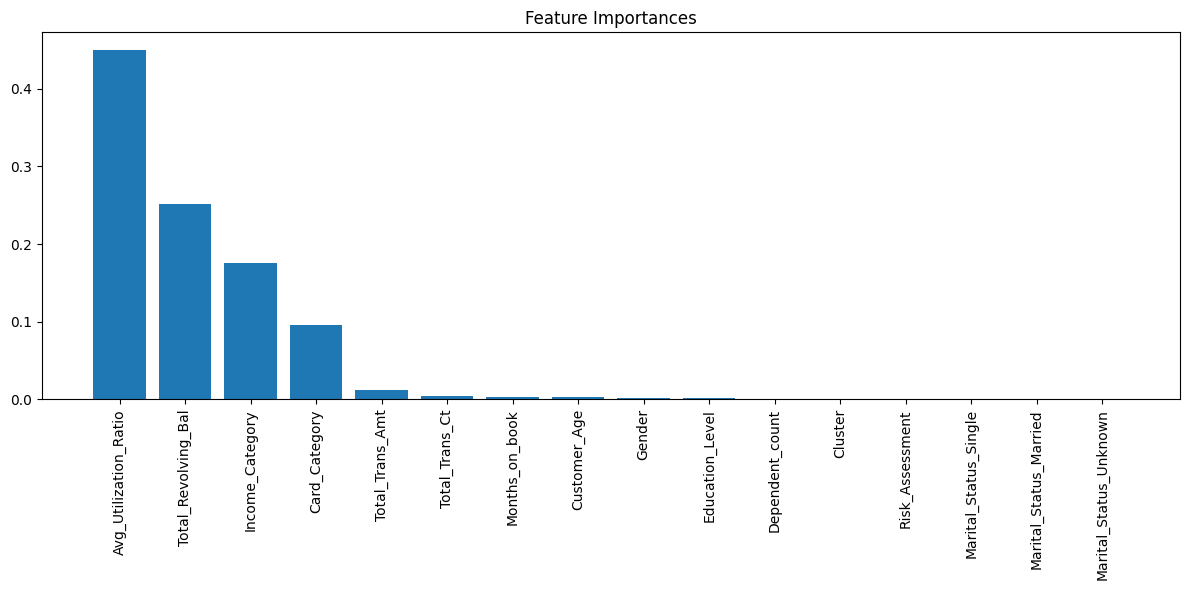

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 提取特徵重要性
feature_importances = final_gbr.feature_importances_

# 可視化特徵重要性
indices = np.argsort(feature_importances)[::-1]
plt.figure(figsize=(12,6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), feature_importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.tight_layout()
plt.show()


在模型的未來優化中，可以考慮保留重要的特徵，而對於那些影響較小的特徵，可以進行特徵篩選，從而簡化模型並提升預測效果。

## 基於模型來預測最佳信用額度

In [ ]:
# 選擇與信用額度預測相關的特徵
features = ['Avg_Utilization_Ratio', 'Total_Trans_Amt', 'Total_Trans_Ct',
            'Income_Category', 'Customer_Age', 'Months_on_book',
            'Gender', 'Education_Level', 'Dependent_count',
            'Marital_Status_Married', 'Marital_Status_Single', 'Marital_Status_Unknown',
            'Card_Category', 'Total_Revolving_Bal',
            'Cluster', 'Risk_Assessment']

# 從資料集中選擇特定的特徵
X = df_one_hot[features]

# 標準化數據
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 將最終的 Gradient Boosting 模型用來預測信用額度
y_pred_optimal = final_gbr.predict(X_scaled)

# 將預測結果加入到原始資料中
df_one_hot['Predicted_Credit_Limit'] = y_pred_optimal

# 查看預測結果
df_one_hot[['Cluster','Credit_Limit', 'Predicted_Credit_Limit']]


,Cluster,Credit_Limit,Predicted_Credit_Limit
0,3.0,12691.0,14420.337000
1,3.0,8256.0,8568.940939
2,3.0,3418.0,13804.165831
3,3.0,3313.0,3230.605716
4,3.0,4716.0,7418.142961
...,...,...,...
10122,1.0,4003.0,4097.629385
10123,2.0,4277.0,4254.670428
10124,2.0,5409.0,6455.960706
10125,2.0,5281.0,5250.957923


## 4. 建立最終信用額度優化策略

### 定義信用評估優化條件

當以下條件達成，調降其信用額度 20%：

1. 當 Risk_Assessment = 1 (高風險客戶)， Predicted_Credit_Limit / Credit_Limit < 0.9 時，調降其信用額度 20 %
2. 當 Avg_Utilization_Ratio (平均信用卡利用率)  = 0


當以下條件達成，調升其信用額度 30%：

1. 當 Risk_Assessment = 3 (低風險客戶)， Predicted_Credit_Limit / Credit_Limit > 1.1 時，調升其信用額度 30 %
2. 當 Cluster = 1 (高價值客戶)，Avg_Utilization_Ratio (平均信用卡利用率) > 0.5


其它不變

In [ ]:
# 設定條件進行信用額度優化，並將調整後的信用額度存放在新欄位
def optimize_credit_limit(row):
    # 調降信用額度 20% 當以下條件達成：
    # 1. Risk_Assessment = 1 且 (Predicted_Credit_Limit / Credit_Limit) < 0.9
    # 2. Avg_Utilization_Ratio = 0
    if (row['Risk_Assessment'] == 1 and (row['Predicted_Credit_Limit'] / row['Credit_Limit']) < 0.9) or row['Avg_Utilization_Ratio'] == 0:
        return row['Credit_Limit'] * 0.8  # 調降 20%

    # 調升信用額度 30% 當以下條件達成：
    # 1. Risk_Assessment = 3 且 (Predicted_Credit_Limit / Credit_Limit) > 1.1
    # 2. Cluster = 1 且 Avg_Utilization_Ratio > 0.5
    elif (row['Risk_Assessment'] == 3 and (row['Predicted_Credit_Limit'] / row['Credit_Limit']) > 1.1) or (row['Cluster'] == 1 and row['Avg_Utilization_Ratio'] > 0.5):
        return row['Credit_Limit'] * 1.3  # 調升 30%

    # 不變的情況，保留原信用額度
    else:
        return row['Credit_Limit']

# 創建新的欄位來存放優化後的信用額度
df_one_hot['Optimized_Credit_Limit'] = df_one_hot.apply(optimize_credit_limit, axis=1)

# 創建一個新欄位來標記信用額度變化情況：調升、調降、不變
df_one_hot['Credit_Change'] = df_one_hot.apply(
    lambda row: 'Increase' if row['Optimized_Credit_Limit'] > row['Credit_Limit']
    else ('Decrease' if row['Optimized_Credit_Limit'] < row['Credit_Limit'] else 'No Change'), axis=1
)

# 根據 Cluster 計算每個群體的調升和調降數量
cluster_credit_change = df_one_hot.groupby(['Cluster', 'Credit_Change']).size().unstack(fill_value=0)

# 輸出結果
print(cluster_credit_change)

# 顯示優化結果的部分資料
df_one_hot[['Credit_Limit', 'Predicted_Credit_Limit', 'Avg_Utilization_Ratio', 'Optimized_Credit_Limit', 'Credit_Change']].head()


Credit_Change  Decrease  Increase  No Change
Cluster                                     
0.0                  26         0         58
1.0                  97        59        558
2.0                1217        25       4076
3.0                1144        48       2819


,Credit_Limit,Predicted_Credit_Limit,Avg_Utilization_Ratio,Optimized_Credit_Limit,Credit_Change
0,12691.0,14420.337000,0.061,12691.0,No Change
1,8256.0,8568.940939,0.105,8256.0,No Change
2,3418.0,13804.165831,0.000,2734.4,Decrease
3,3313.0,3230.605716,0.760,3313.0,No Change
4,4716.0,7418.142961,0.000,3772.8,Decrease


Cluster 0 = 噪聲點

Cluster 1 = 高價值客戶群

Cluster 2 = 忠誠客戶群

Cluster 3 = 不忠誠潛力客戶群

透過上述結果可作為信用卡額度優化的參考